# TASK 6 - CLEAN CODE

## Process Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uniqueLocations = ['single_house', 'garage', 'commercial_building', 'light_building', 'hospital',
       'collective_house', 'school', 'sport_building', 'church', 'Autre/Eglise','Autre/Ecole', 'Autre/Parking','Autre', 'commercial_building sportive']

In [3]:
import os
from bs4 import BeautifulSoup
filename = 'Zinj.kml'

#get the soup
with open(filename, 'r') as kmlCode:
    soup = BeautifulSoup(kmlCode)

In [4]:
placemarks = soup.findAll('placemark')

In [5]:
def centroid(coordinates):
    _len = len(coordinates)
    _sumX = 0
    _sumY = 0
    for vertex in coordinates:
        _sumX += vertex[0]
        _sumY += vertex[1]
    longitude = _sumX/_len
    latitude = _sumY/_len
    return longitude, latitude

In [6]:


locations=[]
longitudes = []
latitudes = []

for placemark in placemarks:
    description = placemark.find('description')
    
    if description != None:
        #find location
        location = str(description.contents[1])
        location = location.replace('<i>','').replace('</i>', '')
        locations.append(location)
        #calculate centroid
        coordinates = placemark.find('coordinates')
        listCoor = str(coordinates.contents[0]).split(" ")
        for i in range(0, len(listCoor)):
            listCoor[i] = listCoor[i].split(",")
            listCoor[i][0]= float(listCoor[i][0])
            listCoor[i][1]= float(listCoor[i][1])
        #get longitude, latitude
        longitude, latitude = centroid(listCoor)    
        longitudes.append(longitude)
        latitudes.append(latitude)
    else:
        for lo in uniqueLocations:
            fin = placemark.find(text=lo)
            if fin!= None:
                locations.append(lo)
                #calculate centroid
                coordinates = placemark.find('coordinates')
                listCoor = str(coordinates.contents[0]).split(" ")
                for i in range(0, len(listCoor)):
                    listCoor[i] = listCoor[i].split(",")
                    listCoor[i][0]= float(listCoor[i][0])
                    listCoor[i][1]= float(listCoor[i][1])
                longitude, latitude = centroid(listCoor)    
                longitudes.append(longitude)
                latitudes.append(latitude)
            
# Create an example dataframe
data = {'longitudes': longitudes, 
        'latitudes': latitudes, 
        'class': locations}
df = pd.DataFrame(data)

#save data to csv
df.to_csv(r'Zinj_process.csv', index = False)

In [7]:
## create 3 datasets for zones
zones = soup.findAll('folder')
zone1 = zones[0]
zone2 = zones[1]

In [8]:
#create dataset for zone1 and zone2
placemarks1 = zone1.findAll('placemark')
placemarks2 = zone2.findAll('placemark')

In [9]:

locations1=[]
longitudes1 = []
latitudes1 = []

for placemark in placemarks1:
    description = placemark.find('description')
    
    if description != None:
        #find location
        location = str(description.contents[1])
        location = location.replace('<i>','').replace('</i>', '')
        locations1.append(location)
        #calculate centroid
        coordinates = placemark.find('coordinates')
        listCoor = str(coordinates.contents[0]).split(" ")
        for i in range(0, len(listCoor)):
            listCoor[i] = listCoor[i].split(",")
            listCoor[i][0]= float(listCoor[i][0])
            listCoor[i][1]= float(listCoor[i][1])
        #get longitude, latitude
        longitude, latitude = centroid(listCoor)    
        longitudes1.append(longitude)
        latitudes1.append(latitude)
    else:
        for lo in uniqueLocations:
            fin = placemark.find(text=lo)
            if fin!= None:
                locations1.append(lo)
                #calculate centroid
                coordinates = placemark.find('coordinates')
                listCoor = str(coordinates.contents[0]).split(" ")
                for i in range(0, len(listCoor)):
                    listCoor[i] = listCoor[i].split(",")
                    listCoor[i][0]= float(listCoor[i][0])
                    listCoor[i][1]= float(listCoor[i][1])
                longitude, latitude = centroid(listCoor)    
                longitudes1.append(longitude)
                latitudes1.append(latitude)
            
# Create an example dataframe
data1 = {'longitudes': longitudes1, 
        'latitudes': latitudes1, 
        'class': locations1}
zone1 = pd.DataFrame(data1)

zone1.to_csv(r'zone1.csv', index = False)            

    

In [10]:

locations1=[]
longitudes1 = []
latitudes1 = []

for placemark in placemarks2:
    description = placemark.find('description')
    
    if description != None:
        #find location
        location = str(description.contents[1])
        location = location.replace('<i>','').replace('</i>', '')
        locations1.append(location)
        #calculate centroid
        coordinates = placemark.find('coordinates')
        listCoor = str(coordinates.contents[0]).split(" ")
        for i in range(0, len(listCoor)):
            listCoor[i] = listCoor[i].split(",")
            listCoor[i][0]= float(listCoor[i][0])
            listCoor[i][1]= float(listCoor[i][1])
        #get longitude, latitude
        longitude, latitude = centroid(listCoor)    
        longitudes1.append(longitude)
        latitudes1.append(latitude)
    else:
        for lo in uniqueLocations:
            fin = placemark.find(text=lo)
            if fin!= None:
                locations1.append(lo)
                #calculate centroid
                coordinates = placemark.find('coordinates')
                listCoor = str(coordinates.contents[0]).split(" ")
                for i in range(0, len(listCoor)):
                    listCoor[i] = listCoor[i].split(",")
                    listCoor[i][0]= float(listCoor[i][0])
                    listCoor[i][1]= float(listCoor[i][1])
                longitude, latitude = centroid(listCoor)    
                longitudes1.append(longitude)
                latitudes1.append(latitude)
            
# Create an example dataframe
data1 = {'longitudes': longitudes1, 
        'latitudes': latitudes1, 
        'class': locations1}
zone2 = pd.DataFrame(data1)

zone2.to_csv(r'zone2.csv', index = False)            

    

In [11]:
df.shape

(3410, 3)

In [12]:
zone1.shape

(2043, 3)

In [13]:
zone2.shape

(532, 3)

In [14]:
3410 - 2043 - 532

835

In [15]:
zone3 = df.iloc[-835:].copy()

In [16]:
zone3.reset_index()

,index,longitudes,latitudes,class
0,2575,7.767211,48.590730,collective_house
1,2576,7.769799,48.595294,commercial_building
2,2577,7.776748,48.588202,single_house
3,2578,7.768863,48.594619,commercial_building
4,2579,7.767059,48.591996,collective_house
...,...,...,...,...
830,3405,7.768158,48.597580,commercial_building
831,3406,7.781419,48.586945,single_house
832,3407,7.781544,48.587027,single_house
833,3408,7.763730,48.597362,single_house


In [17]:
zone3.to_csv(r'zone3.csv', index = False)  

## Draw Plots

### Whole dataset

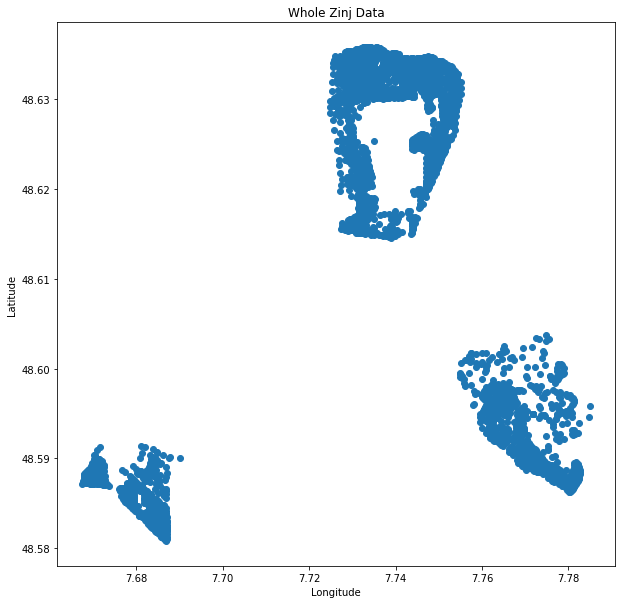

In [18]:
plt.figure(figsize=(10, 10))
plt.title("Whole Zinj Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(df["longitudes"], df["latitudes"])

In [19]:
p1= df.loc[(df["class"]=='commercial_building')]
p2 = df.loc[(df["class"]=='collective_house')]
p3 = df.loc[df["class"]=='commercial_building sportive']
primary =pd.concat([p1, p2, p3])
primary= primary[['longitudes', 'latitudes']]

s1 = df.loc[df["class"]=='single_house']
s2= df.loc[df["class"]=='school']
s3 = df.loc[df["class"]=='light_building']
s4 = df.loc[df["class"]=='garage']
secondary = pd.concat([s1, s2, s3, s4])
secondary= secondary[['longitudes', 'latitudes']]


t1 = df.loc[df["class"]=='church']
t2 = df.loc[df["class"]=='hospital']
t3 = df.loc[df["class"]=='Autre']
t4 = df.loc[df["class"]=='sport_building']
t5 = df.loc[df["class"]=='Autre/Eglise']
t6 = df.loc[df["class"]=='Autre/Ecole']
t7 = df.loc[df["class"]=='Autre/Parking']
third = pd.concat([t1,t2,t3,t4,t5,t6,t7])
third= third[['longitudes', 'latitudes']]

In [20]:
from matplotlib.lines import Line2D

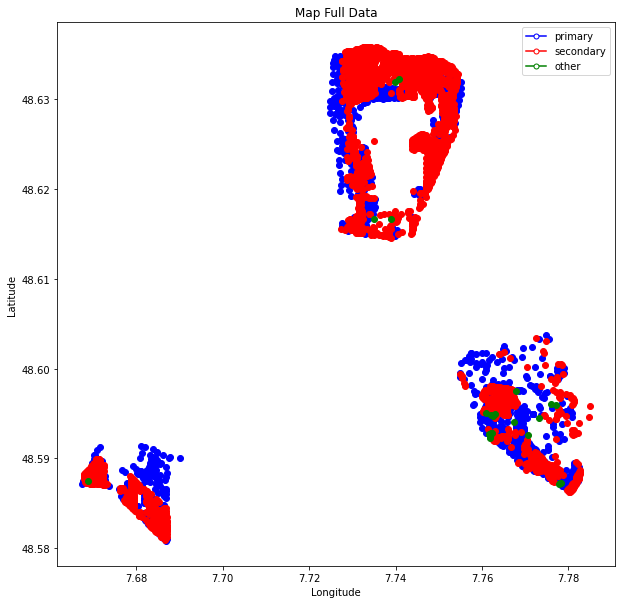

In [21]:
plt.figure(figsize=(10, 10))

plt.title("Map Full Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(primary["longitudes"], primary["latitudes"], color="blue")
plt.scatter(secondary["longitudes"], secondary["latitudes"], color="red")
plt.scatter(third["longitudes"], third["latitudes"], color="green")


legend_elements = [Line2D([0], [0], marker='o', color='blue', label='primary',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='secondary',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='other',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()



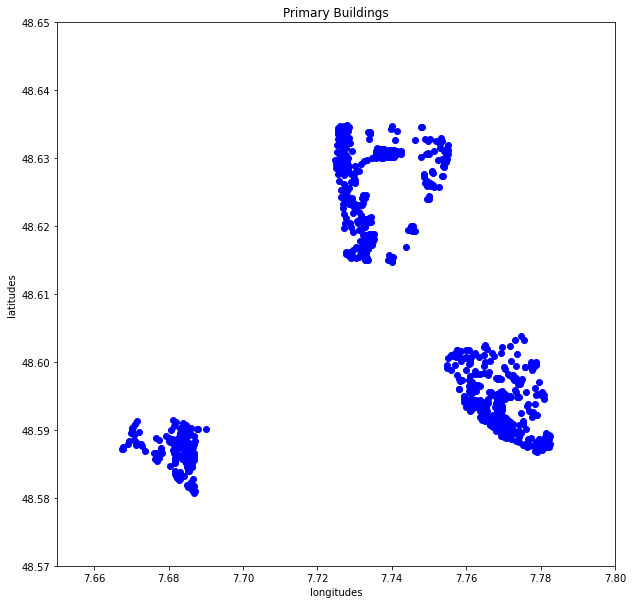

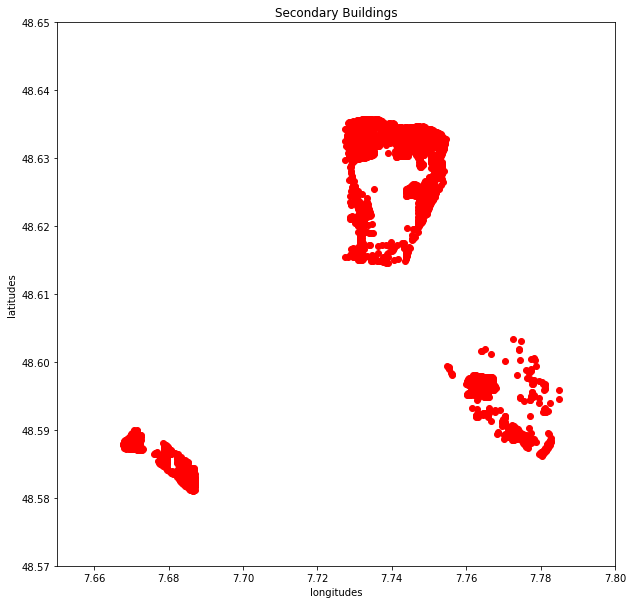

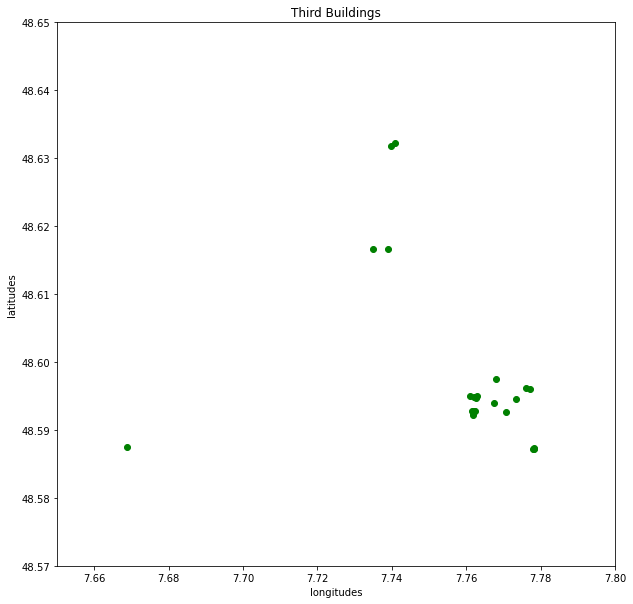

In [22]:
plt.figure(figsize=(10, 10))
plt.xlim(7.65, 7.80)
plt.ylim(48.57, 48.65)
plt.title("Primary Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(primary["longitudes"], primary["latitudes"], color="blue")
plt.show()
plt.figure(figsize=(10, 10))
plt.xlim(7.65, 7.80)
plt.ylim(48.57, 48.65)
plt.title("Secondary Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(secondary["longitudes"], secondary["latitudes"], color="red")
plt.show()
plt.figure(figsize=(10, 10))
plt.xlim(7.65, 7.80)
plt.ylim(48.57, 48.65)
plt.title("Third Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(third["longitudes"], third["latitudes"], color="green")
plt.show()

### Zone 1

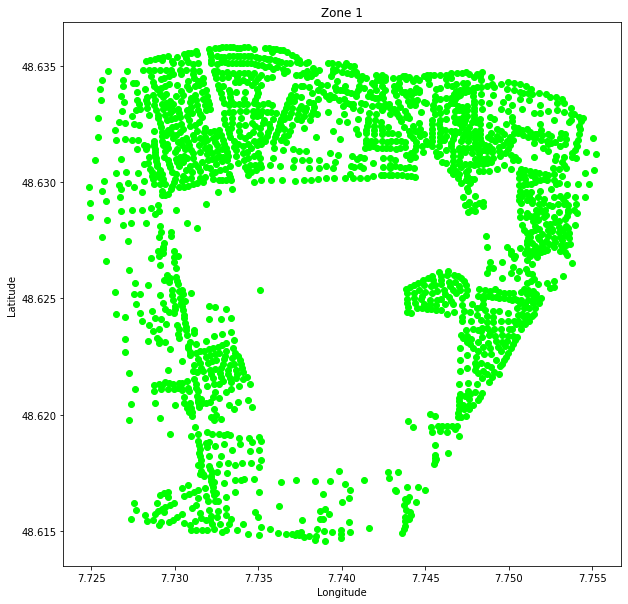

In [23]:
plt.figure(figsize=(10, 10))
plt.title("Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(zone1["longitudes"], zone1["latitudes"], color="lime")

In [24]:
p1= zone1.loc[zone1["class"]=='commercial_building']
p2 = zone1.loc[zone1["class"]=='collective_house']
p3 = zone1.loc[zone1["class"]=='commercial_building sportive']
primary = pd.concat([p1, p2, p3])
primary= primary[['longitudes', 'latitudes']]

s1 = zone1.loc[zone1["class"]=='single_house']
s2= zone1.loc[zone1["class"]=='school']
s3 = zone1.loc[zone1["class"]=='light_building']
s4 = zone1.loc[zone1["class"]=='garage']
secondary = pd.concat([s1, s2, s3, s4])
secondary= secondary[['longitudes', 'latitudes']]


t1 = zone1.loc[zone1["class"]=='church']
t2 = zone1.loc[zone1["class"]=='hospital']
t3 = zone1.loc[zone1["class"]=='Autre']
t4 = zone1.loc[zone1["class"]=='sport_building']
t5 = zone1.loc[zone1["class"]=='Autre/Eglise']
t6 = zone1.loc[zone1["class"]=='Autre/Ecole']
t7 = zone1.loc[zone1["class"]=='Autre/Parking']
third = pd.concat([t1,t2,t3,t4,t5,t6,t7])
third= third[['longitudes', 'latitudes']]

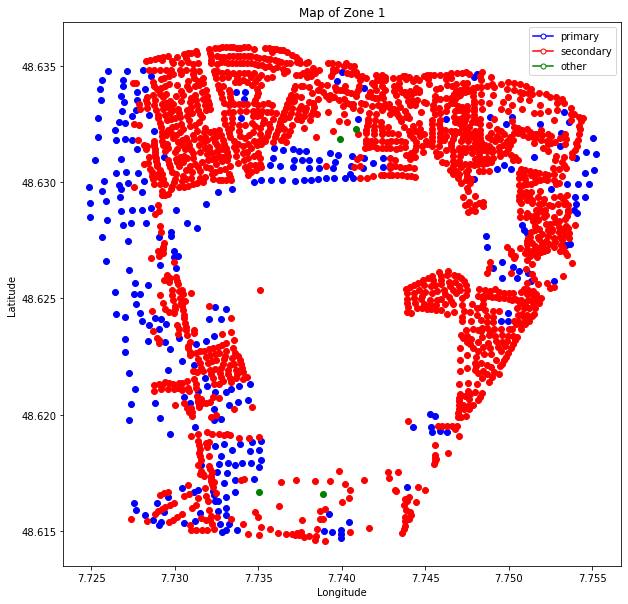

In [25]:
plt.figure(figsize=(10, 10))

plt.title("Map of Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(primary["longitudes"], primary["latitudes"], color="blue")
plt.scatter(secondary["longitudes"], secondary["latitudes"], color="red")
plt.scatter(third["longitudes"], third["latitudes"], color="green")


legend_elements = [Line2D([0], [0], marker='o', color='blue', label='primary',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='secondary',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='other',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()




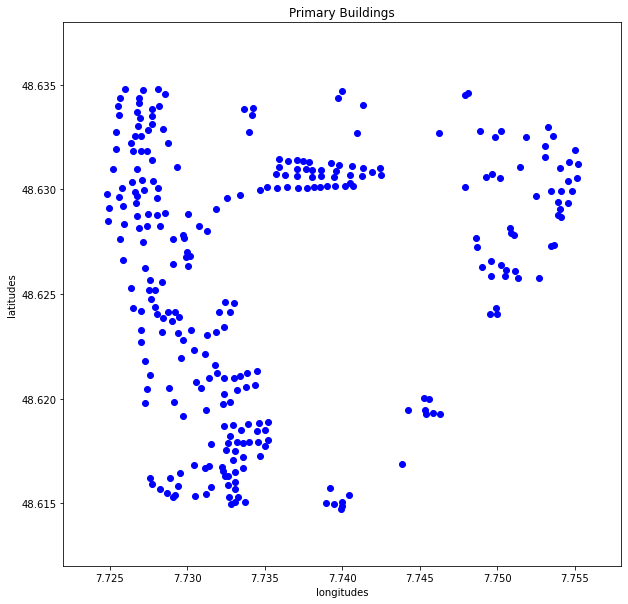

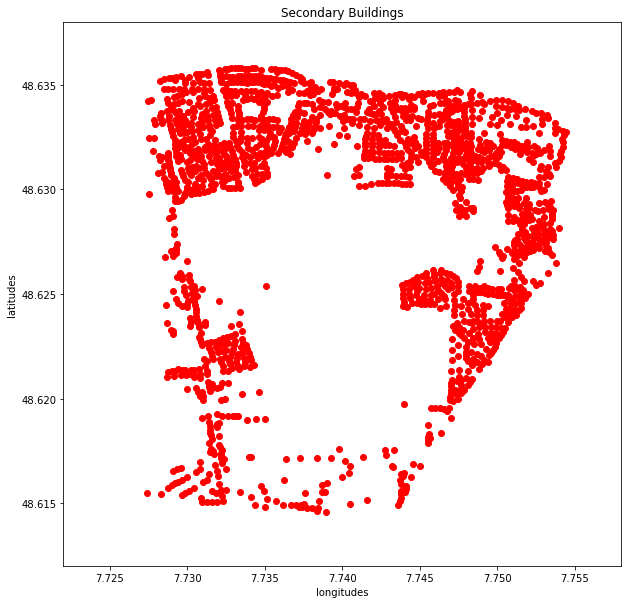

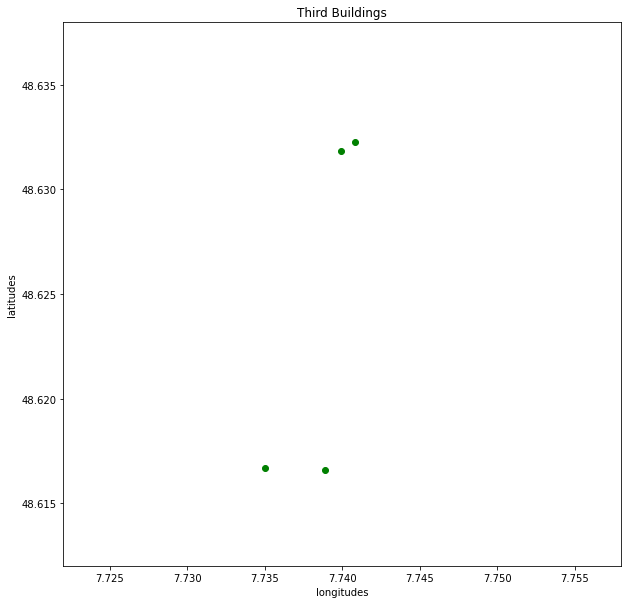

In [26]:
plt.figure(figsize=(10, 10))
plt.xlim(7.722, 7.758)
plt.ylim(48.612, 48.638)
plt.title("Primary Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(primary["longitudes"], primary["latitudes"], color="blue")
plt.show()
plt.figure(figsize=(10, 10))
plt.xlim(7.722, 7.758)
plt.ylim(48.612, 48.638)
plt.title("Secondary Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(secondary["longitudes"], secondary["latitudes"], color="red")
plt.show()
plt.figure(figsize=(10, 10))
plt.xlim(7.722, 7.758)
plt.ylim(48.612, 48.638)
plt.title("Third Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(third["longitudes"], third["latitudes"], color="green")
plt.show()

### Zone 2

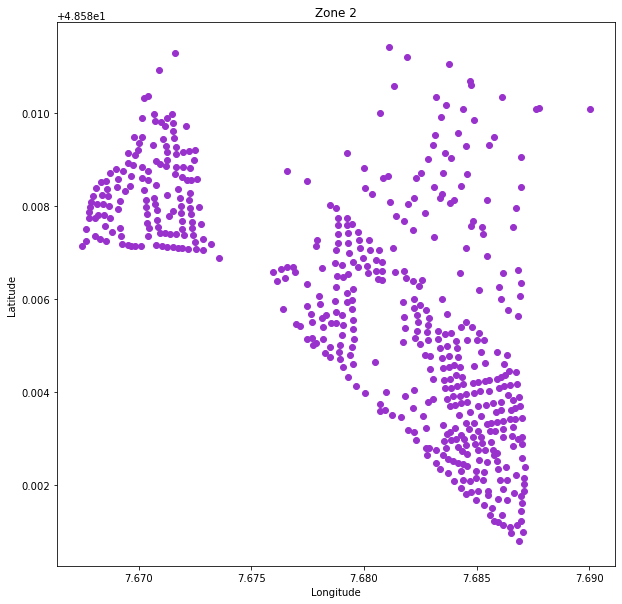

In [27]:
plt.figure(figsize=(10, 10))
plt.title("Zone 2")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(zone2["longitudes"], zone2["latitudes"], color="darkorchid")

In [28]:
p1= zone2.loc[zone2["class"]=='commercial_building']
p2 = zone2.loc[zone2["class"]=='collective_house']
p3 = zone2.loc[zone2["class"]=='commercial_building sportive']
primary = pd.concat([p1, p2, p3])
primary= primary[['longitudes', 'latitudes']]

s1 = zone2.loc[zone2["class"]=='single_house']
s2= zone2.loc[zone2["class"]=='school']
s3 = zone2.loc[zone2["class"]=='light_building']
s4 = zone2.loc[zone2["class"]=='garage']
secondary = pd.concat([s1, s2, s3, s4])
secondary= secondary[['longitudes', 'latitudes']]


t1 = zone2.loc[zone2["class"]=='church']
t2 = zone2.loc[zone2["class"]=='hospital']
t3 = zone2.loc[zone2["class"]=='Autre']
t4 = zone2.loc[zone2["class"]=='sport_building']
t5 = zone2.loc[zone2["class"]=='Autre/Eglise']
t6 = zone2.loc[zone2["class"]=='Autre/Ecole']
t7 = zone2.loc[zone2["class"]=='Autre/Parking']
third = pd.concat([t1,t2,t3,t4,t5,t6,t7])
third= third[['longitudes', 'latitudes']]

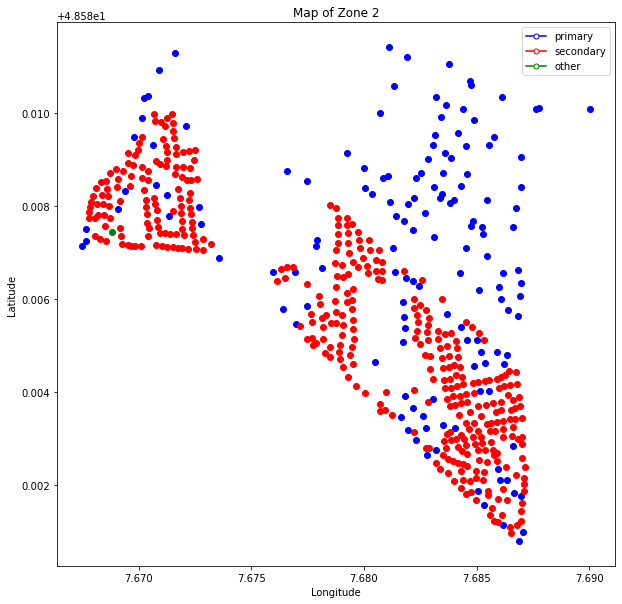

In [29]:
plt.figure(figsize=(10, 10))

plt.title("Map of Zone 2")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(primary["longitudes"], primary["latitudes"], color="blue")
plt.scatter(secondary["longitudes"], secondary["latitudes"], color="red")
plt.scatter(third["longitudes"], third["latitudes"], color="green")


legend_elements = [Line2D([0], [0], marker='o', color='blue', label='primary',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='secondary',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='other',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()





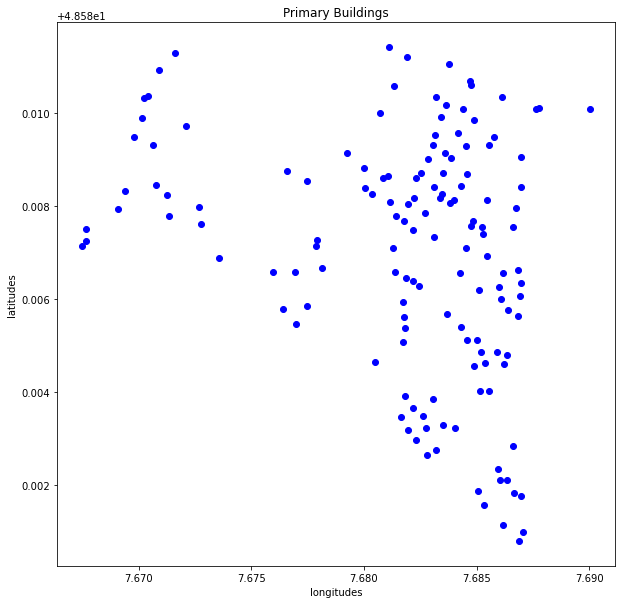

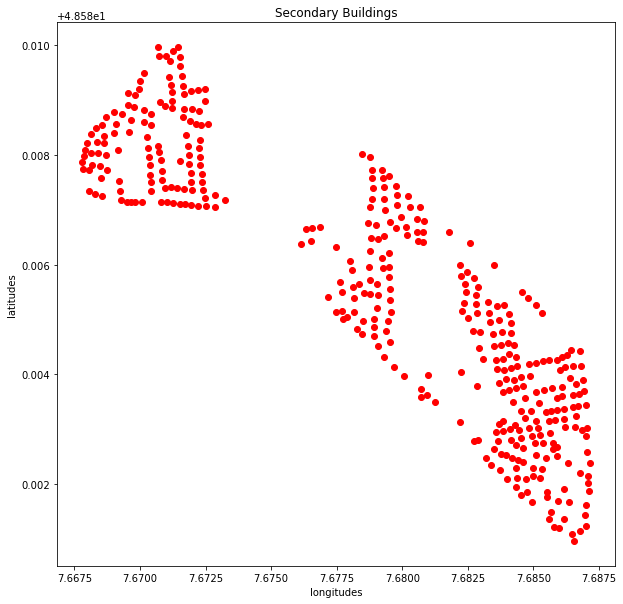

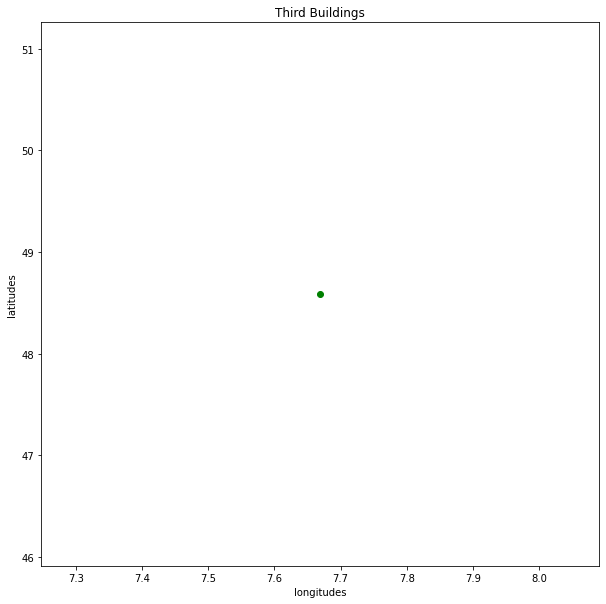

In [30]:
plt.figure(figsize=(10, 10))

plt.title("Primary Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(primary["longitudes"], primary["latitudes"], color="blue")
plt.show()
plt.figure(figsize=(10, 10))

plt.title("Secondary Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(secondary["longitudes"], secondary["latitudes"], color="red")
plt.show()
plt.figure(figsize=(10, 10))

plt.title("Third Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(third["longitudes"], third["latitudes"], color="green")
plt.show()

### Zone 3

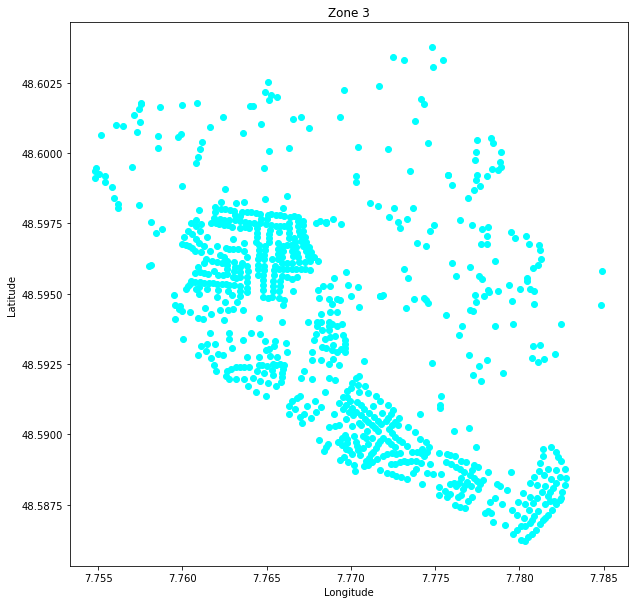

In [31]:
plt.figure(figsize=(10, 10))
plt.title("Zone 3")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(zone3["longitudes"], zone3["latitudes"], color="cyan")

In [32]:
p1= zone3.loc[zone3["class"]=='commercial_building']
p2 = zone3.loc[zone3["class"]=='collective_house']
p3 = zone3.loc[zone3["class"]=='commercial_building sportive']
primary = pd.concat([p1, p2, p3])
primary= primary[['longitudes', 'latitudes']]

s1 = zone3.loc[zone3["class"]=='single_house']
s2= zone3.loc[zone3["class"]=='school']
s3 = zone3.loc[zone3["class"]=='light_building']
s4 = zone3.loc[zone3["class"]=='garage']
secondary = pd.concat([s1, s2, s3, s4])
secondary= secondary[['longitudes', 'latitudes']]


t1 = zone3.loc[zone3["class"]=='church']
t2 = zone3.loc[zone3["class"]=='hospital']
t3 = zone3.loc[zone3["class"]=='Autre']
t4 = zone3.loc[zone3["class"]=='sport_building']
t5 = zone3.loc[zone3["class"]=='Autre/Eglise']
t6 = zone3.loc[zone3["class"]=='Autre/Ecole']
t7 = zone3.loc[zone3["class"]=='Autre/Parking']
third = pd.concat([t1,t2,t3,t4,t5,t6,t7])
third= third[['longitudes', 'latitudes']]

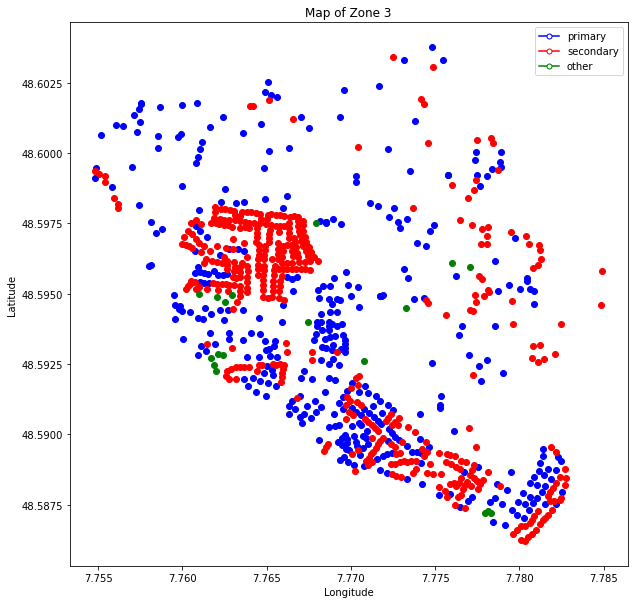

In [33]:
plt.figure(figsize=(10, 10))

plt.title("Map of Zone 3")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(primary["longitudes"], primary["latitudes"], color="blue")
plt.scatter(secondary["longitudes"], secondary["latitudes"], color="red")
plt.scatter(third["longitudes"], third["latitudes"], color="green")


legend_elements = [Line2D([0], [0], marker='o', color='blue', label='primary',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='secondary',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='other',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()



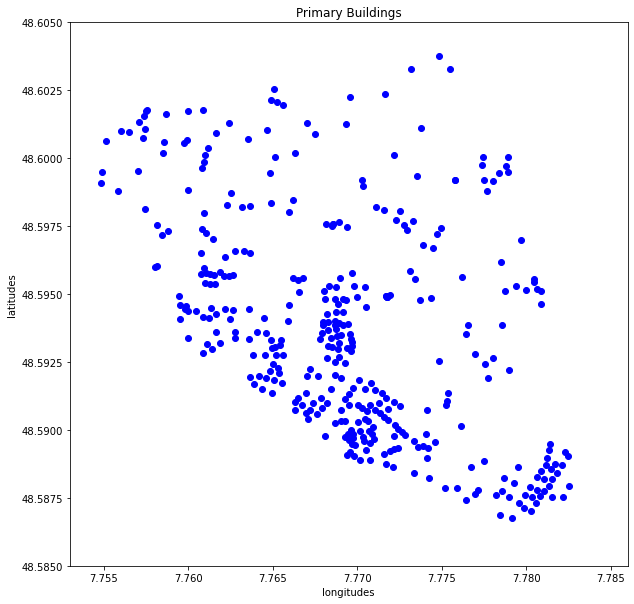

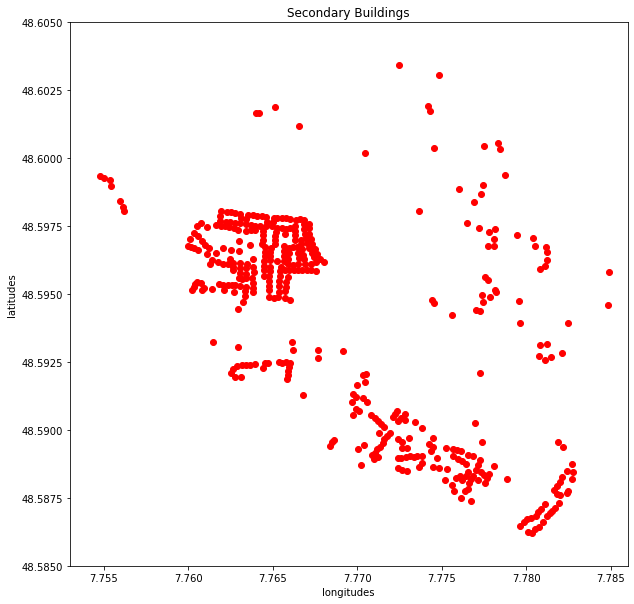

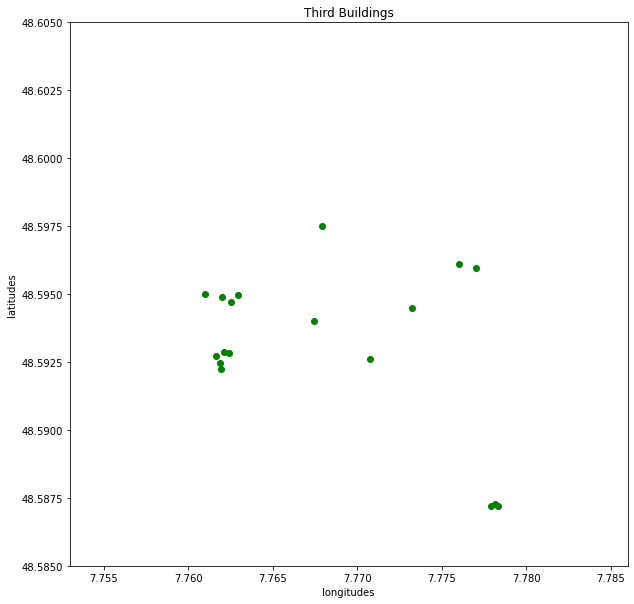

In [34]:
plt.figure(figsize=(10, 10))
plt.xlim(7.753, 7.786)
plt.ylim(48.5850, 48.6050)
plt.title("Primary Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(primary["longitudes"], primary["latitudes"], color="blue")
plt.show()
plt.figure(figsize=(10, 10))
plt.xlim(7.753, 7.786)
plt.ylim(48.5850, 48.6050)
plt.title("Secondary Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(secondary["longitudes"], secondary["latitudes"], color="red")
plt.show()
plt.figure(figsize=(10, 10))
plt.xlim(7.753, 7.786)
plt.ylim(48.5850, 48.6050)
plt.title("Third Buildings")
plt.xlabel("longitudes")
plt.ylabel("latitudes")
plt.scatter(third["longitudes"], third["latitudes"], color="green")
plt.show()

## Analyze STEP- IMPORTANT

### ZONE 1

#### 1. Are buildings randomly distributed or is there some clustering?

In [35]:
zone1.describe()

,longitudes,latitudes
count,2043.000000,2043.000000
mean,7.739921,48.628436
std,0.008422,0.005733
min,7.724835,48.614570
25%,7.732043,48.624436
50%,7.739491,48.630655
75%,7.747705,48.632971
max,7.755213,48.635811


In [36]:
# generate random data
import scipy.stats
lower = 7.724800
upper = 7.75522
mu = (lower + upper)/2
sigma = 0.001
N = 2050

X = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
lower = 48.628400
upper = 48.63582
mu = (lower + upper)/2
sigma = 0.001
N = 2050
Y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
ran = {"longitudes": X, "latitudes": Y }
randomData = pd.DataFrame(ran, columns=["longitudes", "latitudes"])

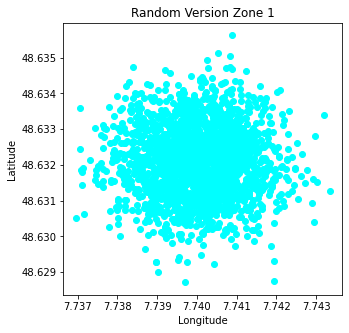

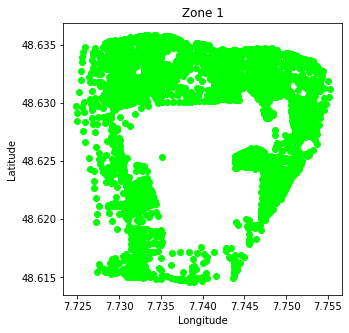

In [37]:
plt.figure(figsize=(5, 5))
plt.title("Random Version Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(randomData["longitudes"], randomData["latitudes"], color="aqua")
plt.show()
plt.figure(figsize=(5, 5))
plt.title("Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(zone1["longitudes"], zone1["latitudes"], color="lime")
plt.show()

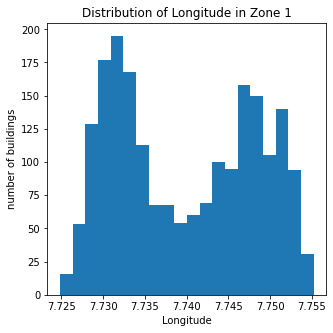

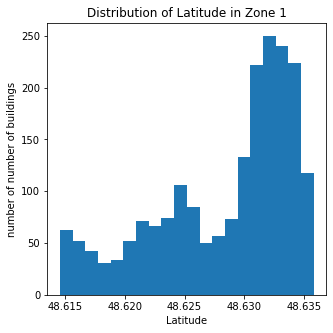

In [38]:
# Histogram
plt.figure(figsize=(5, 5))
plt.xlabel("Longitude")
plt.ylabel("number of buildings")
plt.title("Distribution of Longitude in Zone 1")
plt.hist(zone1["longitudes"], bins=20)
plt.show()
plt.figure(figsize=(5, 5))
plt.xlabel("Latitude")
plt.ylabel("number of number of buildings")
plt.title("Distribution of Latitude in Zone 1")
plt.hist(zone1["latitudes"], bins=20)
plt.show()


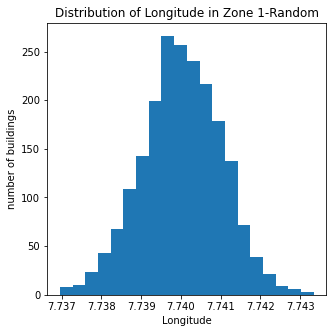

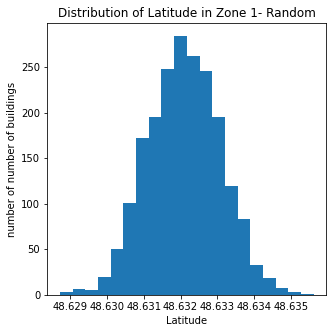

In [39]:
plt.figure(figsize=(5, 5))
plt.xlabel("Longitude")
plt.ylabel("number of buildings")
plt.title("Distribution of Longitude in Zone 1-Random")
plt.hist(randomData["longitudes"], bins=20)
plt.show()
plt.figure(figsize=(5, 5))
plt.xlabel("Latitude")
plt.ylabel("number of number of buildings")
plt.title("Distribution of Latitude in Zone 1- Random")
plt.hist(randomData["latitudes"], bins=20)
plt.show()

The distribution of dataset of zone 1 is clearly clustering.

#### 2. Are buildings of the same building type collocated, anti-collocated or randomly distributed?

<img src="instruction.PNG" width="500" height="600">

In [40]:
def computeKList(dataset):
    klist = []
    _len = len(dataset)
    maximumK = _len/2
    k = 0.01*_len
    while (k < maximumK):
        klist.append(int(k + 0.5))
        k = k*1.5
    return klist

from sklearn.neighbors import NearestNeighbors

def curveCollocation (buildings, otherBuildings):
    curve = []
    klist = computeKList(otherBuildings)
    for k in klist:
        distance = []
        for (x, y) in zip(buildings['longitudes'], buildings['latitudes']):
            knn = NearestNeighbors(n_neighbors=k)
            knn.fit(otherBuildings)
            dis, index = knn.kneighbors([[x, y]])
            distance.append(dis[0][0])

        rd = sum(distance)/len(distance)
    
        curve.append([k, rd])
    return curve

Issue with Astropy package-> self-write ripley function basing on material and code of the RipleysKestimator

In [41]:


def _pairwise_diffs(data):
    npts = len(data)
    diff = np.zeros(shape=(npts * (npts - 1) // 2, 2), dtype=np.double)
    k = 0
    for i in range(0,npts - 1):
        size = npts - i - 1
        diff[k:k + size] = abs(data[i] - data[i+1:])
        k += size

    return diff

# x_max, y_max : float, float, optional
   #     Maximum rectangular coordinates of the area of study.
   #     Required if ``mode == 'translation'`` or ``mode == ohser``.
   # x_min, y_min : float, float, optional
def ripleyFunction( data, radii, x_max, y_max, x_min, y_min, area):
    data1 = np.asarray(data)
    npts = len(data)
    ripley = np.zeros(len(radii))
    hor_dist = np.zeros(shape=(npts*(npts-1)) // 2, dtype=np.double)
    ver_dist = np.zeros(shape=(npts*(npts - 1)) // 2, dtype=np.double)
    for k in range(0, npts -1):
        min_hor_dist = min(x_max - data['longitudes'].iloc[k], data['longitudes'].iloc[k]- x_min)
        min_ver_dist = min(y_max - data['latitudes'].iloc[k], data['latitudes'].iloc[k]-y_min)
        start = (k * (2 * (npts - 1) - (k - 1))) // 2
        end = ((k + 1) * (2 * (npts - 1) - k)) // 2
        hor_dist[start: end] = min_hor_dist * np.ones(npts - 1 - k)
        ver_dist[start: end] = min_ver_dist * np.ones(npts - 1 - k)
    diff = _pairwise_diffs(data1)
    dist = np.hypot(diff[:, 0], diff[:, 1])
    dist_ind = dist <= np.hypot(hor_dist, ver_dist)

    w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
                       np.arccos(np.minimum(hor_dist, dist) / dist)) / np.pi)
    w2 = (3 / 4 - 0.5 * (np.arccos(ver_dist / dist * ~dist_ind) +
                np.arccos(hor_dist / dist * ~dist_ind)) / np.pi)

    weight = dist_ind * w1 + ~dist_ind * w2
    for r in range(len(radii)):
        ripley[r] = ((dist < radii[r]) / weight).sum()

    ripley = area * 2. * ripley / (npts * (npts - 1))
    
    return ripley
        
#cf = ripleyFunction (ch, np.linspace(0, (1/2)**0.5 , 100), 0.022168, 0.022127, 0.022089, 0.022118, 1)    
    

In [42]:

### https://docs.astropy.org/en/stable/api/astropy.stats.RipleysKEstimator.html

import numpy as np
import math




class RipleysKEstimator:
    """
    Estimators for Ripley's K function for two-dimensional spatial data.
    See [1]_, [2]_, [3]_, [4]_, [5]_ for detailed mathematical and
    practical aspects of those estimators.

    Parameters
    ----------
    area : float
        Area of study from which the points where observed.
    x_max, y_max : float, float, optional
        Maximum rectangular coordinates of the area of study.
        Required if ``mode == 'translation'`` or ``mode == ohser``.
    x_min, y_min : float, float, optional
        Minimum rectangular coordinates of the area of study.
        Required if ``mode == 'variable-width'`` or ``mode == ohser``.

    Examples
    --------
    >>> import numpy as np
    >>> from matplotlib import pyplot as plt # doctest: +SKIP
    >>> from astropy.stats import RipleysKEstimator
    >>> z = np.random.uniform(low=5, high=10, size=(100, 2))
    >>> Kest = RipleysKEstimator(area=25, x_max=10, y_max=10,
    ... x_min=5, y_min=5)
    >>> r = np.linspace(0, 2.5, 100)
    >>> plt.plot(r, Kest.poisson(r)) # doctest: +SKIP
    >>> plt.plot(r, Kest(data=z, radii=r, mode='none')) # doctest: +SKIP
    >>> plt.plot(r, Kest(data=z, radii=r, mode='translation')) # doctest: +SKIP
    >>> plt.plot(r, Kest(data=z, radii=r, mode='ohser')) # doctest: +SKIP
    >>> plt.plot(r, Kest(data=z, radii=r, mode='var-width')) # doctest: +SKIP
    >>> plt.plot(r, Kest(data=z, radii=r, mode='ripley')) # doctest: +SKIP

    References
    ----------
    .. [1] Peebles, P.J.E. *The large scale structure of the universe*.
       <https://ui.adsabs.harvard.edu/abs/1980lssu.book.....P>
    .. [2] Spatial descriptive statistics.
       <https://en.wikipedia.org/wiki/Spatial_descriptive_statistics>
    .. [3] Package spatstat.
       <https://cran.r-project.org/web/packages/spatstat/spatstat.pdf>
    .. [4] Cressie, N.A.C. (1991). Statistics for Spatial Data,
       Wiley, New York.
    .. [5] Stoyan, D., Stoyan, H. (1992). Fractals, Random Shapes and
       Point Fields, Akademie Verlag GmbH, Chichester.
    """

    def __init__(self, area, x_max=None, y_max=None, x_min=None, y_min=None):
        self.area = area
        self.x_max = x_max
        self.y_max = y_max
        self.x_min = x_min
        self.y_min = y_min

    @property
    def area(self):
        return self._area

    @area.setter
    def area(self, value):
        if isinstance(value, (float, int)) and value > 0:
            self._area = value
        else:
            raise ValueError(f'area is expected to be a positive number. Got {value}.')

    @property
    def y_max(self):
        return self._y_max

    @y_max.setter
    def y_max(self, value):
        if value is None or isinstance(value, (float, int)):
            self._y_max = value
        else:
            raise ValueError('y_max is expected to be a real number '
                             'or None. Got {}.'.format(value))

    @property
    def x_max(self):
        return self._x_max

    @x_max.setter
    def x_max(self, value):
        if value is None or isinstance(value, (float, int)):
            self._x_max = value
        else:
            raise ValueError('x_max is expected to be a real number '
                             'or None. Got {}.'.format(value))

    @property
    def y_min(self):
        return self._y_min

    @y_min.setter
    def y_min(self, value):
        if value is None or isinstance(value, (float, int)):
            self._y_min = value
        else:
            raise ValueError(f'y_min is expected to be a real number. Got {value}.')

    @property
    def x_min(self):
        return self._x_min

    @x_min.setter
    def x_min(self, value):
        if value is None or isinstance(value, (float, int)):
            self._x_min = value
        else:
            raise ValueError(f'x_min is expected to be a real number. Got {value}.')

    def __call__(self, data, radii, mode='none'):
        return self.evaluate(data=data, radii=radii, mode=mode)

    def _pairwise_diffs(self, data):
        npts = len(data)
        diff = np.zeros(shape=(npts * (npts - 1) // 2, 2), dtype=np.double)
        k = 0
        for i in range(npts - 1):
            size = npts - i - 1
            diff[k:k + size] = abs(data[i] - data[i+1:])
            k += size

        return diff

    def poisson(self, radii):
        """
        Evaluates the Ripley K function for the homogeneous Poisson process,
        also known as Complete State of Randomness (CSR).

        Parameters
        ----------
        radii : 1D array
            Set of distances in which Ripley's K function will be evaluated.

        Returns
        -------
        output : 1D array
            Ripley's K function evaluated at ``radii``.
        """

        return np.pi * radii * radii

    def Lfunction(self, data, radii, mode='none'):
        """
        Evaluates the L function at ``radii``. For parameter description
        see ``evaluate`` method.
        """

        return np.sqrt(self.evaluate(data, radii, mode=mode) / np.pi)

    def Hfunction(self, data, radii, mode='none'):
        """
        Evaluates the H function at ``radii``. For parameter description
        see ``evaluate`` method.
        """

        return self.Lfunction(data, radii, mode=mode) - radii

    def evaluate(self, data, radii, mode='none'):
        """
        Evaluates the Ripley K estimator for a given set of values ``radii``.

        Parameters
        ----------
        data : 2D array
            Set of observed points in as a n by 2 array which will be used to
            estimate Ripley's K function.
        radii : 1D array
            Set of distances in which Ripley's K estimator will be evaluated.
            Usually, it's common to consider max(radii) < (area/2)**0.5.
        mode : str
            Keyword which indicates the method for edge effects correction.
            Available methods are 'none', 'translation', 'ohser', 'var-width',
            and 'ripley'.

            * 'none'
                this method does not take into account any edge effects
                whatsoever.
            * 'translation'
                computes the intersection of rectangular areas centered at
                the given points provided the upper bounds of the
                dimensions of the rectangular area of study. It assumes that
                all the points lie in a bounded rectangular region satisfying
                x_min < x_i < x_max; y_min < y_i < y_max. A detailed
                description of this method can be found on ref [4].
            * 'ohser'
                this method uses the isotropized set covariance function of
                the window of study as a weight to correct for
                edge-effects. A detailed description of this method can be
                found on ref [4].
            * 'var-width'
                this method considers the distance of each observed point to
                the nearest boundary of the study window as a factor to
                account for edge-effects. See [3] for a brief description of
                this method.
            * 'ripley'
                this method is known as Ripley's edge-corrected estimator.
                The weight for edge-correction is a function of the
                proportions of circumferences centered at each data point
                which crosses another data point of interest. See [3] for
                a detailed description of this method.

        Returns
        -------
        ripley : 1D array
            Ripley's K function estimator evaluated at ``radii``.
        """

        data = np.asarray(data)

        if not data.shape[1] == 2:
            raise ValueError('data must be an n by 2 array, where n is the '
                             'number of observed points.')

        npts = len(data)
        ripley = np.zeros(len(radii))

        if mode == 'none':
            diff = self._pairwise_diffs(data)
            distances = np.hypot(diff[:, 0], diff[:, 1])
            for r in range(len(radii)):
                ripley[r] = (distances < radii[r]).sum()

            ripley = self.area * 2. * ripley / (npts * (npts - 1))
        # eq. 15.11 Stoyan book page 283
        elif mode == 'translation':
            diff = self._pairwise_diffs(data)
            distances = np.hypot(diff[:, 0], diff[:, 1])
            intersec_area = (((self.x_max - self.x_min) - diff[:, 0]) *
                             ((self.y_max - self.y_min) - diff[:, 1]))

            for r in range(len(radii)):
                dist_indicator = distances < radii[r]
                ripley[r] = ((1 / intersec_area) * dist_indicator).sum()

            ripley = (self.area**2 / (npts * (npts - 1))) * 2 * ripley
        # Stoyan book page 123 and eq 15.13
        elif mode == 'ohser':
            diff = self._pairwise_diffs(data)
            distances = np.hypot(diff[:, 0], diff[:, 1])
            a = self.area
            b = max((self.y_max - self.y_min) / (self.x_max - self.x_min),
                    (self.x_max - self.x_min) / (self.y_max - self.y_min))
            x = distances / math.sqrt(a / b)
            u = np.sqrt((x * x - 1) * (x > 1))
            v = np.sqrt((x * x - b ** 2) * (x < math.sqrt(b ** 2 + 1)) * (x > b))
            c1 = np.pi - 2 * x * (1 + 1 / b) + x * x / b
            c2 = 2 * np.arcsin((1 / x) * (x > 1)) - 1 / b - 2 * (x - u)
            c3 = (2 * np.arcsin(((b - u * v) / (x * x))
                                * (x > b) * (x < math.sqrt(b ** 2 + 1)))
                  + 2 * u + 2 * v / b - b - (1 + x * x) / b)

            cov_func = ((a / np.pi) * (c1 * (x >= 0) * (x <= 1)
                        + c2 * (x > 1) * (x <= b)
                        + c3 * (b < x) * (x < math.sqrt(b ** 2 + 1))))

            for r in range(len(radii)):
                dist_indicator = distances < radii[r]
                ripley[r] = ((1 / cov_func) * dist_indicator).sum()

            ripley = (self.area**2 / (npts * (npts - 1))) * 2 * ripley
        # Cressie book eq 8.2.20 page 616
        elif mode == 'var-width':
            lt_dist = np.minimum(np.minimum(self.x_max - data[:, 0], self.y_max - data[:, 1]),
                                 np.minimum(data[:, 0] - self.x_min, data[:, 1] - self.y_min))

            for r in range(len(radii)):
                for i in range(npts):
                    for j in range(npts):
                        if i != j:
                            diff = abs(data[i] - data[j])
                            dist = math.sqrt((diff * diff).sum())
                            if dist < radii[r] < lt_dist[i]:
                                ripley[r] = ripley[r] + 1
                lt_dist_sum = (lt_dist > radii[r]).sum()
                if not lt_dist_sum == 0:
                    ripley[r] = ripley[r] / lt_dist_sum

            ripley = self.area * ripley / npts
        # Cressie book eq 8.4.22 page 640
        elif mode == 'ripley':
            hor_dist = np.zeros(shape=(npts * (npts - 1)) // 2,
                                dtype=np.double)
            ver_dist = np.zeros(shape=(npts * (npts - 1)) // 2,
                                dtype=np.double)

            for k in range(npts - 1):
                min_hor_dist = min(self.x_max - data[k][0],
                                   data[k][0] - self.x_min)
                min_ver_dist = min(self.y_max - data[k][1],
                                   data[k][1] - self.y_min)
                start = (k * (2 * (npts - 1) - (k - 1))) // 2
                end = ((k + 1) * (2 * (npts - 1) - k)) // 2
                hor_dist[start: end] = min_hor_dist * np.ones(npts - 1 - k)
                ver_dist[start: end] = min_ver_dist * np.ones(npts - 1 - k)

            diff = self._pairwise_diffs(data)
            dist = np.hypot(diff[:, 0], diff[:, 1])
            dist_ind = dist <= np.hypot(hor_dist, ver_dist)

            w1 = (1 - (np.arccos(np.minimum(ver_dist, dist) / dist) +
                       np.arccos(np.minimum(hor_dist, dist) / dist)) / np.pi)
            w2 = (3 / 4 - 0.5 * (
                np.arccos(ver_dist / dist * ~dist_ind) +
                np.arccos(hor_dist / dist * ~dist_ind)) / np.pi)

            weight = dist_ind * w1 + ~dist_ind * w2

            for r in range(len(radii)):
                ripley[r] = ((dist < radii[r]) / weight).sum()

            ripley = self.area * 2. * ripley / (npts * (npts - 1))
        else:
            raise ValueError(f'mode {mode} is not implemented.')

        return ripley

### Normalize the dataset

In [43]:
### Normalize the dataset
from sklearn import preprocessing
import numpy as np
# Get dataset
# Normalize total_bedrooms column
x_array = np.array(zone1['longitudes'])
normalized_X = preprocessing.normalize([x_array])
y_array = np.array(zone1['latitudes'])
normalized_Y = preprocessing.normalize([y_array])

In [44]:
norm_data = {'longitudes': normalized_X[0], 'latitudes': normalized_Y[0]}
norm_data = pd.DataFrame(norm_data, columns=["longitudes", "latitudes"])
norm_data['class']= zone1['class']
norm_data

,longitudes,latitudes,class
0,0.022117,0.022118,single_house
1,0.022092,0.022126,single_house
2,0.022092,0.022126,single_house
3,0.022094,0.022119,garage
4,0.022095,0.022126,single_house
...,...,...,...
2038,0.022095,0.022125,single_house
2039,0.022096,0.022125,single_house
2040,0.022094,0.022125,single_house
2041,0.022094,0.022126,single_house


In [45]:
norm_data.describe()

,longitudes,latitudes
count,2043.000000,2043.000000
mean,0.022124,0.022124
std,0.000024,0.000003
min,0.022081,0.022118
25%,0.022102,0.022122
50%,0.022123,0.022125
75%,0.022146,0.022126
max,0.022168,0.022127


In [46]:
p1= norm_data.loc[norm_data["class"]=='commercial_building']
p2 = norm_data.loc[norm_data["class"]=='collective_house']
p3 = norm_data.loc[norm_data["class"]=='commercial_building sportive']
primary = pd.concat([p1, p2, p3])
primary= primary[['longitudes', 'latitudes']]

s1 = norm_data.loc[norm_data["class"]=='single_house']
s2= norm_data.loc[norm_data["class"]=='school']
s3 = norm_data.loc[norm_data["class"]=='light_building']
s4 = norm_data.loc[norm_data["class"]=='garage']
secondary = pd.concat([s1, s2, s3, s4])
secondary= secondary[['longitudes', 'latitudes']]


t1 = norm_data.loc[norm_data["class"]=='church']
t2 = norm_data.loc[norm_data["class"]=='hospital']
t3 = norm_data.loc[norm_data["class"]=='Autre']
t4 = norm_data.loc[norm_data["class"]=='sport_building']
t5 = norm_data.loc[norm_data["class"]=='Autre/Eglise']
t6 = norm_data.loc[norm_data["class"]=='Autre/Ecole']
t7 = norm_data.loc[norm_data["class"]=='Autre/Parking']
third = pd.concat([t1,t2,t3,t4,t5,t6,t7])
third= third[['longitudes', 'latitudes']]

##### Among Primary Buildings

Commercial Buildings

In [47]:
#c1 = p1[["longitudes", "latitudes"]]
#c2 = p2[["longitudes", "latitudes"]]
#sample = curveCollocation(c1, c2)

In [48]:
data = pd.concat([p1, p3])
data = data[["longitudes", "latitudes"]]
data.describe()


,longitudes,latitudes
count,133.000000,133.000000
mean,0.022101,0.022124
std,0.000023,0.000002
min,0.022081,0.022118
25%,0.022087,0.022122
50%,0.022091,0.022124
75%,0.022099,0.022126
max,0.022166,0.022127


In [49]:
#generate random distribution
lower = data['longitudes'].min()
upper = data['longitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

X = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
lower = data['latitudes'].min()
upper = data['latitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10
Y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

ran_ = {"longitudes": X, "latitudes": Y }
random_ = pd.DataFrame(ran_, columns=["longitudes", "latitudes"])

In [50]:
random_.head()

,longitudes,latitudes
0,0.022124,0.022119
1,0.022119,0.022122
2,0.022111,0.022124
3,0.022099,0.022124
4,0.022154,0.022124


In [51]:
X[0:10]

array([0.02212413, 0.02211937, 0.02211121, 0.02209903, 0.02215367,
       0.0221563 , 0.0221377 , 0.02216542, 0.02212159, 0.02209984])

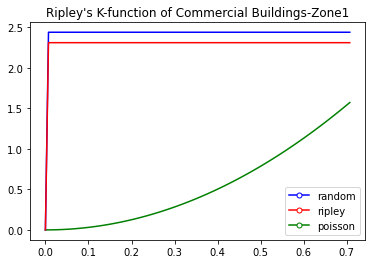

In [50]:
#from astropy.stats import RipleysKEstimator
x_max = max(random_['longitudes'].max(), data['longitudes'].max())
y_max = max(random_['latitudes'].max(), data['latitudes'].max())
x_min = min(random_['longitudes'].min(), data['longitudes'].min())
y_min = min(random_['latitudes'].max(), data['latitudes'].min())
Kest = RipleysKEstimator(area=1)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = ripleyFunction (random_, r, x_max, y_max, x_min, y_min, 1)
plt.plot(r, r_kest, c="b") 
r_kest= ripleyFunction (data, r, x_max, y_max, x_min, y_min, 1)
plt.plot(r, r_kest, c="r") 
plt.title("Ripley's K-function of Commercial Buildings-Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='random',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='ripley',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()



Collective  houses

In [51]:
data = p2
data = data[["longitudes", "latitudes"]]
data.describe()

,longitudes,latitudes
count,157.000000,157.000000
mean,0.022121,0.022122
std,0.000022,0.000003
min,0.022089,0.022118
25%,0.022104,0.022119
50%,0.022114,0.022123
75%,0.022131,0.022125
max,0.022168,0.022127


In [52]:
#generate random data
lower = data['longitudes'].min()
upper = data['longitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

X = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
lower = data['latitudes'].min()
upper = data['latitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10
Y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

ran_ = {"longitudes": X, "latitudes": Y }
random_ = pd.DataFrame(ran_, columns=["longitudes", "latitudes"])

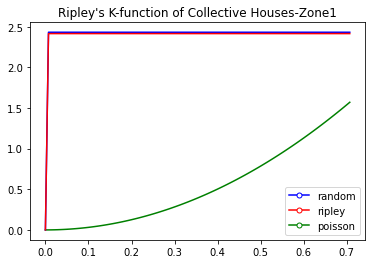

In [53]:
#from astropy.stats import RipleysKEstimator
x_max = max(random_['longitudes'].max(), data['longitudes'].max())
y_max = max(random_['latitudes'].max(), data['latitudes'].max())
x_min = min(random_['longitudes'].min(), data['longitudes'].min())
y_min = min(random_['latitudes'].max(), data['latitudes'].min())
Kest = RipleysKEstimator(area=1)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = ripleyFunction (random_, r, x_max, y_max, x_min, y_min, 1)
plt.plot(r, r_kest, c="b") 
r_kest= ripleyFunction (data, r, x_max, y_max, x_min, y_min, 1)
plt.plot(r, r_kest, c="r") 
plt.title("Ripley's K-function of Collective Houses-Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='random',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='ripley',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

within the group

In [54]:
data = primary

data.describe()

,longitudes,latitudes
count,290.000000,290.000000
mean,0.022112,0.022123
std,0.000025,0.000003
min,0.022081,0.022118
25%,0.022091,0.022120
50%,0.022104,0.022124
75%,0.022124,0.022125
max,0.022168,0.022127


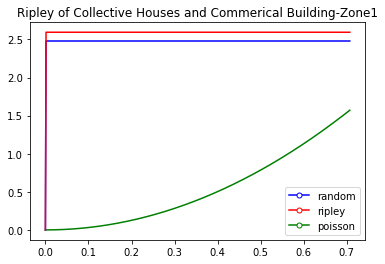

In [55]:
#generate random distribution
lower = data['longitudes'].min()
upper = data['longitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

X = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
lower = data['latitudes'].min()
upper = data['latitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

Y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

ran_ = {"longitudes": X, "latitudes": Y }
random_ = pd.DataFrame(ran_, columns=["longitudes", "latitudes"])
#############################
x_max = max(random_['longitudes'].max(), data['longitudes'].max())
y_max = max(random_['latitudes'].max(), data['latitudes'].max())
x_min = min(random_['longitudes'].min(), data['longitudes'].min())
y_min = min(random_['latitudes'].max(), data['latitudes'].min())
Kest = RipleysKEstimator(area=1)
r = np.linspace(0, (1/2)**0.5 , 500)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = ripleyFunction (random_, r, x_max, y_max, x_min, y_min, 1)
plt.plot(r, r_kest, c="b") 
r_kest= ripleyFunction (data, r, x_max, y_max, x_min, y_min, 1)
plt.plot(r, r_kest, c="r") 
plt.title("Ripley of Collective Houses and Commerical Building-Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='random',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='ripley',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

In [56]:
data.shape[0]

290

##### Among Secondary Buildings

Single house

In [57]:
data = s1[["longitudes", 'latitudes']]

data.describe()

,longitudes,latitudes
count,1598.000000,1598.000000
mean,0.022126,0.022125
std,0.000024,0.000002
min,0.022089,0.022118
25%,0.022103,0.022123
50%,0.022130,0.022125
75%,0.022148,0.022126
max,0.022166,0.022127


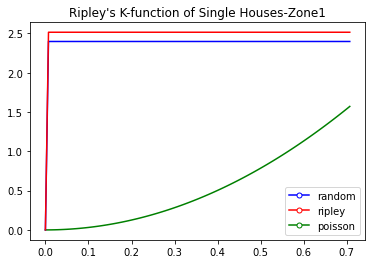

In [58]:
#generate random distribution
lower = data['longitudes'].min()
upper = data['longitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

X = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
lower = data['latitudes'].min()
upper = data['latitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

Y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

ran_ = {"longitudes": X, "latitudes": Y }
random_ = pd.DataFrame(ran_, columns=["longitudes", "latitudes"])
#############################
x_max = max(random_['longitudes'].max(), data['longitudes'].max())
y_max = max(random_['latitudes'].max(), data['latitudes'].max())
x_min = min(random_['longitudes'].min(), data['longitudes'].min())
y_min = min(random_['latitudes'].max(), data['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(random_, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Ripley's K-function of Single Houses-Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='random',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='ripley',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

School

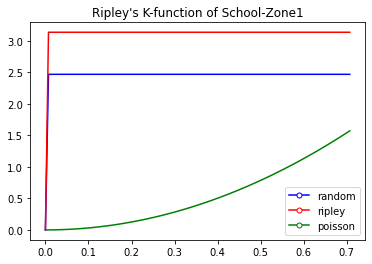

In [59]:

#s1 = norm_data.loc[norm_data["class"]=='single_house']
#s2= norm_data.loc[norm_data["class"]=='school']
#s3 = norm_data.loc[norm_data["class"]=='light_building']
#s4 = norm_data.loc[norm_data["class"]=='garage']
data = s2[["longitudes", 'latitudes']]
#generate random distribution
lower = data['longitudes'].min()
upper = data['longitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

X = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
lower = data['latitudes'].min()
upper = data['latitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

Y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

ran_ = {"longitudes": X, "latitudes": Y }
random_ = pd.DataFrame(ran_, columns=["longitudes", "latitudes"])
#############################
x_max = max(random_['longitudes'].max(), data['longitudes'].max())
y_max = max(random_['latitudes'].max(), data['latitudes'].max())
x_min = min(random_['longitudes'].min(), data['longitudes'].min())
y_min = min(random_['latitudes'].max(), data['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(random_, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Ripley's K-function of School-Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='random',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='ripley',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

Light buildings

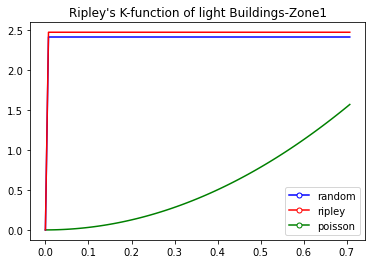

In [60]:

#s1 = norm_data.loc[norm_data["class"]=='single_house']
#s2= norm_data.loc[norm_data["class"]=='school']
#s3 = norm_data.loc[norm_data["class"]=='light_building']
#s4 = norm_data.loc[norm_data["class"]=='garage']
data = s3[["longitudes", 'latitudes']]
#generate random distribution
lower = data['longitudes'].min()
upper = data['longitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

X = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
lower = data['latitudes'].min()
upper = data['latitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

Y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

ran_ = {"longitudes": X, "latitudes": Y }
random_ = pd.DataFrame(ran_, columns=["longitudes", "latitudes"])
#############################
x_max = max(random_['longitudes'].max(), data['longitudes'].max())
y_max = max(random_['latitudes'].max(), data['latitudes'].max())
x_min = min(random_['longitudes'].min(), data['longitudes'].min())
y_min = min(random_['latitudes'].max(), data['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(random_, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Ripley's K-function of light Buildings-Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='random',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='ripley',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

Garage

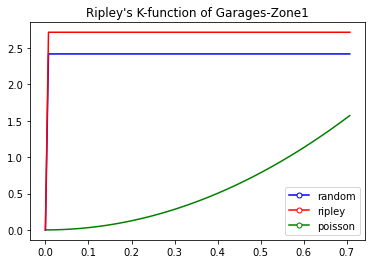

In [61]:

#s1 = norm_data.loc[norm_data["class"]=='single_house']
#s2= norm_data.loc[norm_data["class"]=='school']
#s3 = norm_data.loc[norm_data["class"]=='light_building']
#s4 = norm_data.loc[norm_data["class"]=='garage']
data = s4[["longitudes", 'latitudes']]
#generate random distribution
lower = data['longitudes'].min()
upper = data['longitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

X = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
lower = data['latitudes'].min()
upper = data['latitudes'].max()
mu = (lower + upper)/2
sigma = 0.0001
N = data.shape[0] + 10

Y = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)

ran_ = {"longitudes": X, "latitudes": Y }
random_ = pd.DataFrame(ran_, columns=["longitudes", "latitudes"])
#############################
x_max = max(random_['longitudes'].max(), data['longitudes'].max())
y_max = max(random_['latitudes'].max(), data['latitudes'].max())
x_min = min(random_['longitudes'].min(), data['longitudes'].min())
y_min = min(random_['latitudes'].max(), data['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(random_, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Ripley's K-function of Garages-Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='random',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='ripley',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

### 3.Are building belonging to different building types collocated, anti-collocated or are their locations unrelated—for example, you will try to answer the question if garages are collocated with commercial buildings.  

#### Primary Buildings

commercial buildings

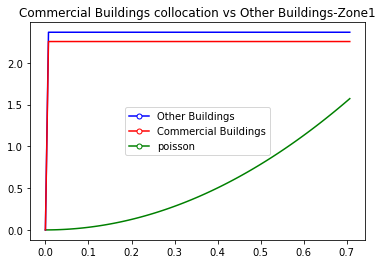

In [62]:
#first datagroup
data_1 = pd.concat([p1, p3])
data_1 = data_1[["longitudes", "latitudes"]]

#second datagroup
data_2 = pd.concat([p2, s1,s2,s3,s4])
data_2 = data_2[["longitudes", "latitudes"]]

#############################
x_max = max(data_1['longitudes'].max(), data_2['longitudes'].max())
y_max = max(data_1['latitudes'].max(), data_2['latitudes'].max())
x_min = min(data_1['longitudes'].min(), data_2['longitudes'].min())
y_min = min(data_1['latitudes'].max(), data_2['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(data_2, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data_1, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Commercial Buildings collocation vs Other Buildings-Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Other Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='Commercial Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()


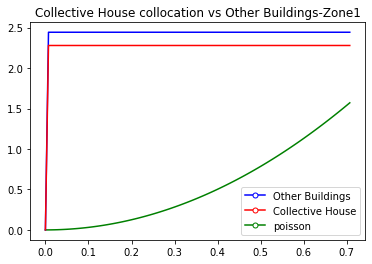

In [63]:
#first datagroup
data_1 = p2
data_1 = data_1[["longitudes", "latitudes"]]

#second datagroup
data_2 = pd.concat([p1, p3, s1,s2,s3,s4])
data_2 = data_2[["longitudes", "latitudes"]]

#############################
x_max = max(data_1['longitudes'].max(), data_2['longitudes'].max())
y_max = max(data_1['latitudes'].max(), data_2['latitudes'].max())
x_min = min(data_1['longitudes'].min(), data_2['longitudes'].min())
y_min = min(data_1['latitudes'].max(), data_2['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(data_2, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data_1, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Collective House collocation vs Other Buildings-Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Other Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='Collective House',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()



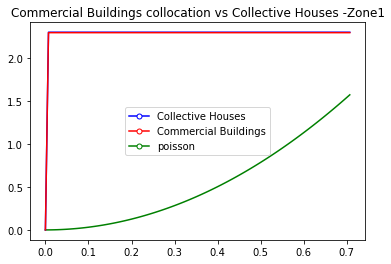

In [64]:
#first datagroup
data_1 = pd.concat([p1, p3])
data_1 = data_1[["longitudes", "latitudes"]]

#second datagroup
data_2 = p2
data_2 = data_2[["longitudes", "latitudes"]]

#############################
x_max = max(data_1['longitudes'].max(), data_2['longitudes'].max())
y_max = max(data_1['latitudes'].max(), data_2['latitudes'].max())
x_min = min(data_1['longitudes'].min(), data_2['longitudes'].min())
y_min = min(data_1['latitudes'].max(), data_2['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(data_2, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data_1, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Commercial Buildings collocation vs Collective Houses -Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Collective Houses',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='Commercial Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

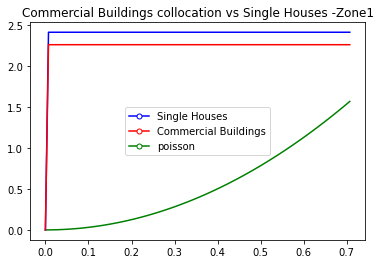

In [65]:
#first datagroup
data_1 = pd.concat([p1, p3])
data_1 = data_1[["longitudes", "latitudes"]]

#second datagroup
data_2 = s1
data_2 = data_2[["longitudes", "latitudes"]]

#############################
x_max = max(data_1['longitudes'].max(), data_2['longitudes'].max())
y_max = max(data_1['latitudes'].max(), data_2['latitudes'].max())
x_min = min(data_1['longitudes'].min(), data_2['longitudes'].min())
y_min = min(data_1['latitudes'].max(), data_2['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(data_2, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data_1, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Commercial Buildings collocation vs Single Houses -Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Single Houses',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='Commercial Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

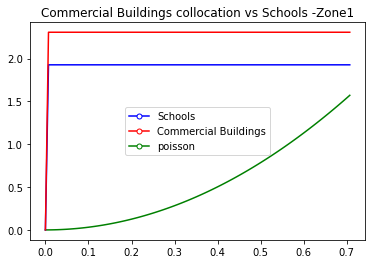

In [66]:
#first datagroup
data_1 = pd.concat([p1, p3])
data_1 = data_1[["longitudes", "latitudes"]]

#second datagroup
data_2 = s2
data_2 = data_2[["longitudes", "latitudes"]]

#############################
x_max = max(data_1['longitudes'].max(), data_2['longitudes'].max())
y_max = max(data_1['latitudes'].max(), data_2['latitudes'].max())
x_min = min(data_1['longitudes'].min(), data_2['longitudes'].min())
y_min = min(data_1['latitudes'].max(), data_2['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(data_2, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data_1, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Commercial Buildings collocation vs Schools -Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Schools',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='Commercial Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

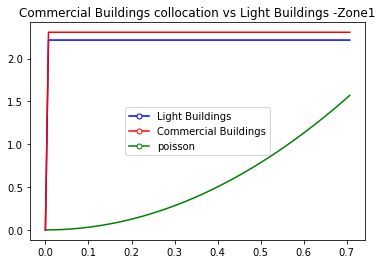

In [67]:
#first datagroup
data_1 = pd.concat([p1, p3])
data_1 = data_1[["longitudes", "latitudes"]]

#second datagroup
data_2 = s3
data_2 = data_2[["longitudes", "latitudes"]]

#############################
x_max = max(data_1['longitudes'].max(), data_2['longitudes'].max())
y_max = max(data_1['latitudes'].max(), data_2['latitudes'].max())
x_min = min(data_1['longitudes'].min(), data_2['longitudes'].min())
y_min = min(data_1['latitudes'].max(), data_2['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(data_2, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data_1, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Commercial Buildings collocation vs Light Buildings -Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Light Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='Commercial Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

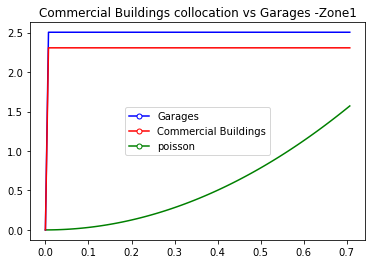

In [68]:
#first datagroup
data_1 = pd.concat([p1, p3])
data_1 = data_1[["longitudes", "latitudes"]]

#second datagroup
data_2 = s4
data_2 = data_2[["longitudes", "latitudes"]]

#############################
x_max = max(data_1['longitudes'].max(), data_2['longitudes'].max())
y_max = max(data_1['latitudes'].max(), data_2['latitudes'].max())
x_min = min(data_1['longitudes'].min(), data_2['longitudes'].min())
y_min = min(data_1['latitudes'].max(), data_2['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(data_2, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data_1, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Commercial Buildings collocation vs Garages -Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Garages',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='Commercial Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

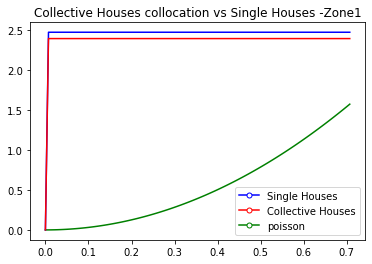

In [69]:
#first datagroup
data_1 = p2
data_1 = data_1[["longitudes", "latitudes"]]

#second datagroup
data_2 = s1
data_2 = data_2[["longitudes", "latitudes"]]

#############################
x_max = max(data_1['longitudes'].max(), data_2['longitudes'].max())
y_max = max(data_1['latitudes'].max(), data_2['latitudes'].max())
x_min = min(data_1['longitudes'].min(), data_2['longitudes'].min())
y_min = min(data_1['latitudes'].max(), data_2['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(data_2, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data_1, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Collective Houses collocation vs Single Houses -Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Single Houses',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='Collective Houses',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

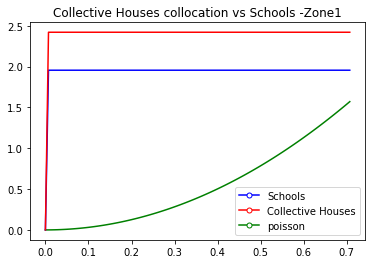

In [70]:
#first datagroup
data_1 = p2
data_1 = data_1[["longitudes", "latitudes"]]

#second datagroup
data_2 = s2
data_2 = data_2[["longitudes", "latitudes"]]

#############################
x_max = max(data_1['longitudes'].max(), data_2['longitudes'].max())
y_max = max(data_1['latitudes'].max(), data_2['latitudes'].max())
x_min = min(data_1['longitudes'].min(), data_2['longitudes'].min())
y_min = min(data_1['latitudes'].max(), data_2['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(data_2, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data_1, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Collective Houses collocation vs Schools -Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Schools',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='Collective Houses',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

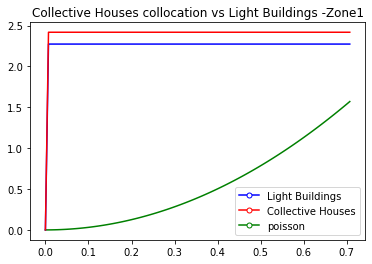

In [71]:
#first datagroup
data_1 = p2
data_1 = data_1[["longitudes", "latitudes"]]

#second datagroup
data_2 = s3
data_2 = data_2[["longitudes", "latitudes"]]

#############################
x_max = max(data_1['longitudes'].max(), data_2['longitudes'].max())
y_max = max(data_1['latitudes'].max(), data_2['latitudes'].max())
x_min = min(data_1['longitudes'].min(), data_2['longitudes'].min())
y_min = min(data_1['latitudes'].max(), data_2['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(data_2, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data_1, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Collective Houses collocation vs Light Buildings -Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Light Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='Collective Houses',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

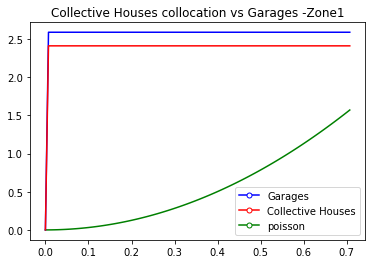

In [72]:
#first datagroup
data_1 = p2
data_1 = data_1[["longitudes", "latitudes"]]

#second datagroup
data_2 = s4
data_2 = data_2[["longitudes", "latitudes"]]

#############################
x_max = max(data_1['longitudes'].max(), data_2['longitudes'].max())
y_max = max(data_1['latitudes'].max(), data_2['latitudes'].max())
x_min = min(data_1['longitudes'].min(), data_2['longitudes'].min())
y_min = min(data_1['latitudes'].max(), data_2['latitudes'].min())
Kest = RipleysKEstimator(area=1, x_max=x_max, y_max=y_max, x_min=x_min, y_min=y_min)
r = np.linspace(0, (1/2)**0.5 , 100)
plt.plot(r, Kest.poisson(r), c="g") 


r_kest = Kest(data_2, r, mode="ripley")
plt.plot(r, r_kest, c="b") 
r_kest= Kest(data_1, r, mode="ripley")
plt.plot(r, r_kest, c="r") 
plt.title("Collective Houses collocation vs Garages -Zone1")
legend_elements = [Line2D([0], [0], marker='o', color='blue', label='Garages',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='red', label='Collective Houses',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='green', label='poisson',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

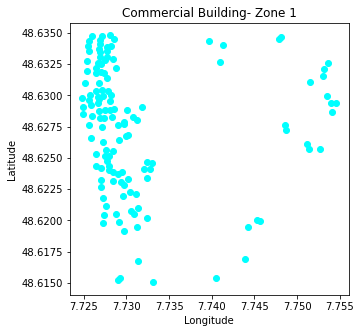

In [67]:
plt.figure(figsize=(5, 5))
plt.title("Commercial Building- Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(zone1[zone1["class"]=="commercial_building"]["longitudes"], zone1[zone1["class"]=="commercial_building"]["latitudes"], color="cyan")
plt.show()

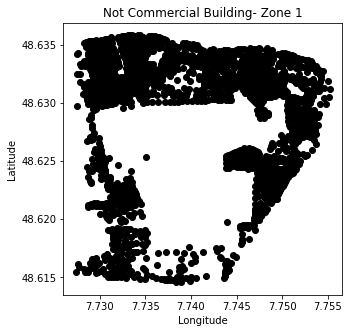

In [68]:
plt.figure(figsize=(5, 5))
plt.title("Not Commercial Building- Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(zone1[zone1["class"]!="commercial_building"]["longitudes"], zone1[zone1["class"]!="commercial_building"]["latitudes"], color="black")

plt.show()

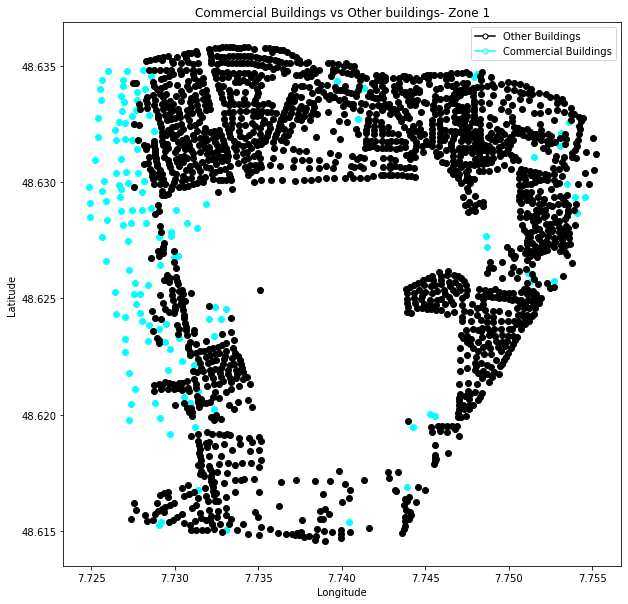

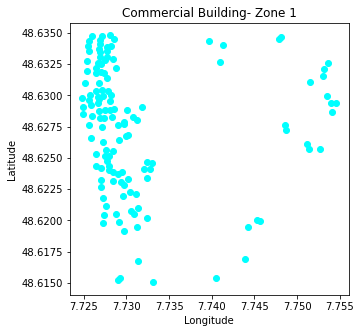

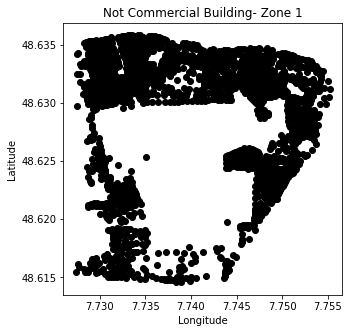

In [69]:
plt.figure(figsize=(10, 10))


plt.title("Commercial Buildings vs Other buildings- Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(zone1[zone1["class"]=="commercial_building"]["longitudes"], zone1[zone1["class"]=="commercial_building"]["latitudes"], color="cyan")
plt.scatter(zone1[zone1["class"]!="commercial_building"]["longitudes"], zone1[zone1["class"]!="commercial_building"]["latitudes"], color="black")
legend_elements = [Line2D([0], [0], marker='o', color='black', label='Other Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='cyan', label='Commercial Buildings',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

plt.figure(figsize=(5, 5))
plt.title("Commercial Building- Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(zone1[zone1["class"]=="commercial_building"]["longitudes"], zone1[zone1["class"]=="commercial_building"]["latitudes"], color="cyan")
plt.show()

plt.figure(figsize=(5, 5))
plt.title("Not Commercial Building- Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(zone1[zone1["class"]!="commercial_building"]["longitudes"], zone1[zone1["class"]!="commercial_building"]["latitudes"], color="black")

plt.show()

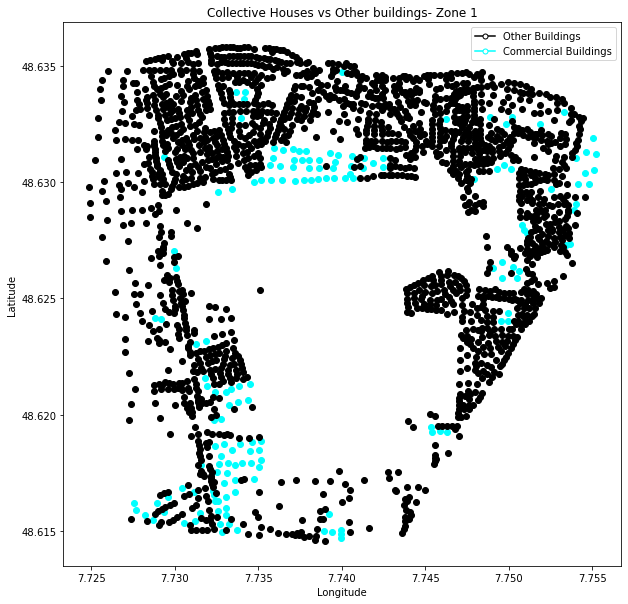

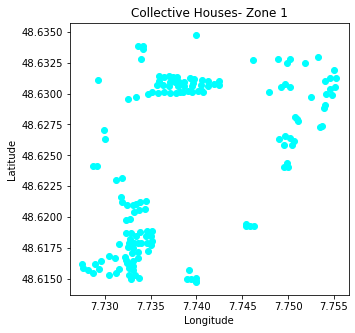

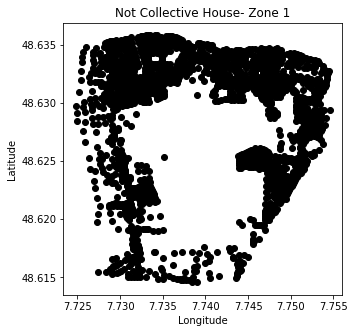

In [70]:
plt.figure(figsize=(10, 10))


plt.title("Collective Houses vs Other buildings- Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.scatter(zone1[zone1["class"]=="collective_house"]["longitudes"], zone1[zone1["class"]=="collective_house"]["latitudes"], color="cyan")
plt.scatter(zone1[zone1["class"]!="collective_house"]["longitudes"], zone1[zone1["class"]!="collective_house"]["latitudes"], color="black")
legend_elements = [Line2D([0], [0], marker='o', color='black', label='Other Buildings',
                          markerfacecolor='1', markersize=5),
                   Line2D([0], [0], marker='o', color='cyan', label='Commercial Buildings',
                          markerfacecolor='1', markersize=5)]
plt.legend(handles=legend_elements)
plt.show()

plt.figure(figsize=(5, 5))
plt.title("Collective Houses- Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(zone1[zone1["class"]=="collective_house"]["longitudes"], zone1[zone1["class"]=="collective_house"]["latitudes"], color="cyan")
plt.show()

plt.figure(figsize=(5, 5))
plt.title("Not Collective House- Zone 1")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.scatter(zone1[zone1["class"]!="collective_house"]["longitudes"], zone1[zone1["class"]!="collective_house"]["latitudes"], color="black")

plt.show()

# PYSAL

tutorials: https://towardsdatascience.com/what-is-exploratory-spatial-data-analysis-esda-335da79026ee
tutorials: http://pysal.org/notebooks/viz/splot/esda_morans_viz.html
Convert PD dataframe into Geo spatial dataset: https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html

In [75]:
import geopandas

from libpysal.weights.contiguity import Queen
from libpysal import examples

import geopandas as gpd
import pysal
from pysal import esda, weights
from esda.moran import Moran, Moran_Local
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster



/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


## Auto collocation

In [123]:
p1= norm_data.loc[norm_data["class"]=='commercial_building']
p2 = norm_data.loc[norm_data["class"]=='collective_house']
p3 = norm_data.loc[norm_data["class"]=='commercial_building sportive']
primary = pd.concat([p1, p2, p3])

data = primary.copy()
data['encode']= [1 if x =='commercial_building' else 0 for x in data['class'] ]
#data = data[["longitudes", "latitudes"]]
gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data['longitudes'], data['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'


In [124]:
y = gdf['encode']
moran = Moran(y, w)
moran.I

0.5654796872375053

In [93]:
from splot.esda import moran_scatterplot
from splot.esda import plot_moran



<Figure size 720x720 with 0 Axes>

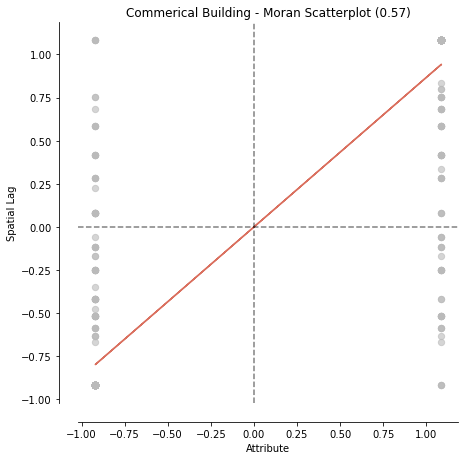

<Figure size 720x720 with 0 Axes>

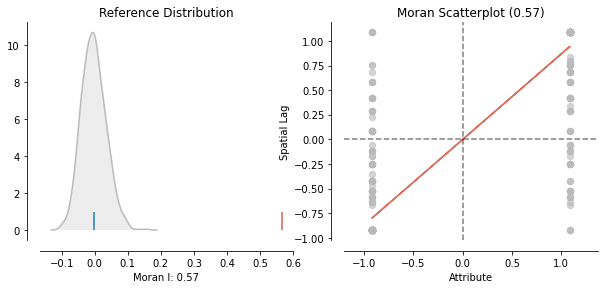

In [125]:
plt.figure(figsize=(10, 10))
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.title("Commerical Building - Moran Scatterplot (0.57)")
plt.show()

plt.figure(figsize=(10, 10))
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

In [126]:
moran.p_sim

0.001

/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


<Figure size 720x720 with 0 Axes>

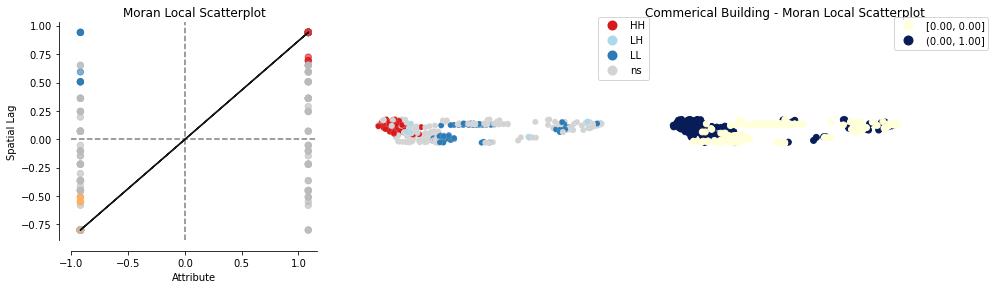

In [127]:
# calculate Moran_Local and plot
moran_loc = Moran_Local(y, w)

from splot.esda import plot_local_autocorrelation
plt.figure(figsize=(10, 10))
plot_local_autocorrelation(moran_loc, gdf, 'encode')
plt.title("Commerical Building - Moran Local Scatterplot")
plt.show()

value of moran :  0.5654796872375053


<Figure size 720x720 with 0 Axes>

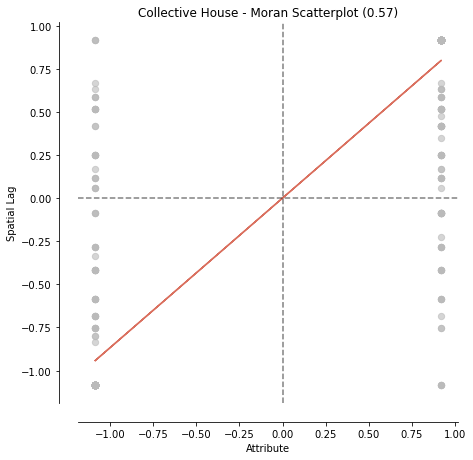

<Figure size 720x720 with 0 Axes>

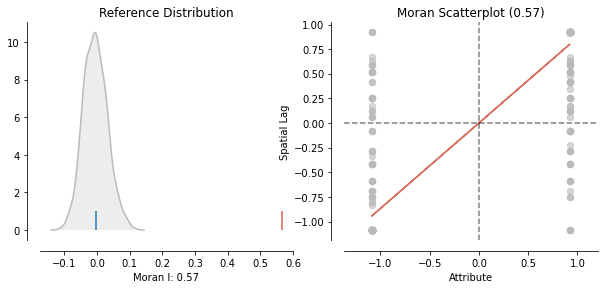

sim:  0.001


/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


<Figure size 720x720 with 0 Axes>

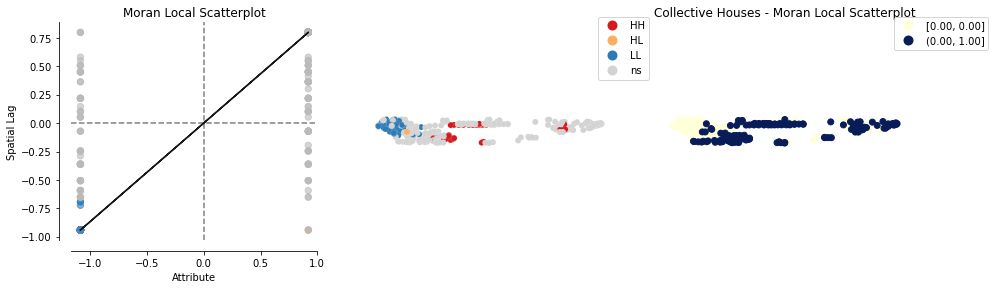

In [128]:
# collective house
p1= norm_data.loc[norm_data["class"]=='commercial_building']
p2 = norm_data.loc[norm_data["class"]=='collective_house']
p3 = norm_data.loc[norm_data["class"]=='commercial_building sportive']
primary = pd.concat([p1, p2, p3])

data = primary.copy()
data['encode']= [1 if x =='collective_house' else 0 for x in data['class'] ]
#data = data[["longitudes", "latitudes"]]
gdf = geopandas.GeoDataFrame(
    data, geometry=geopandas.points_from_xy(data['longitudes'], data['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'

y = gdf['encode']
moran = Moran(y, w)
print( "value of moran : " , moran.I)

plt.figure(figsize=(10, 10))
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.title("Collective House - Moran Scatterplot (0.57)")
plt.show()

plt.figure(figsize=(10, 10))
plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()
print("sim: ", moran.p_sim)

moran_loc = Moran_Local(y, w)

from splot.esda import plot_local_autocorrelation
plt.figure(figsize=(10, 10))
plot_local_autocorrelation(moran_loc, gdf, 'encode')
plt.title("Collective Houses - Moran Local Scatterplot")
plt.show()

## Binary collocation

In [104]:
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv

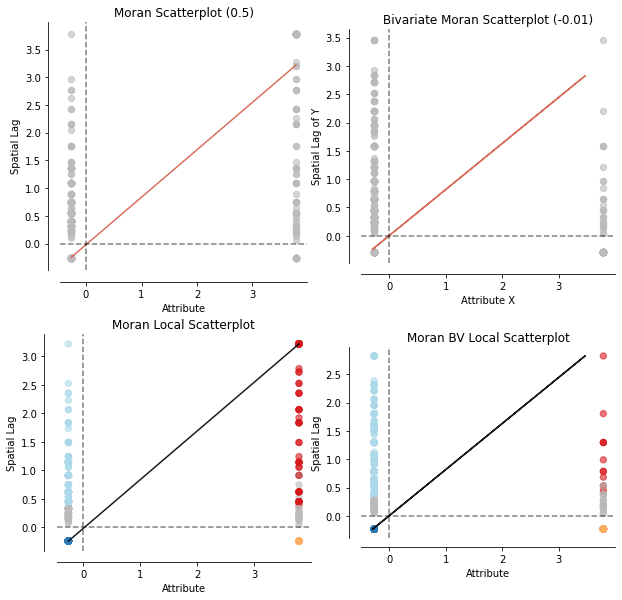

<Figure size 720x720 with 0 Axes>

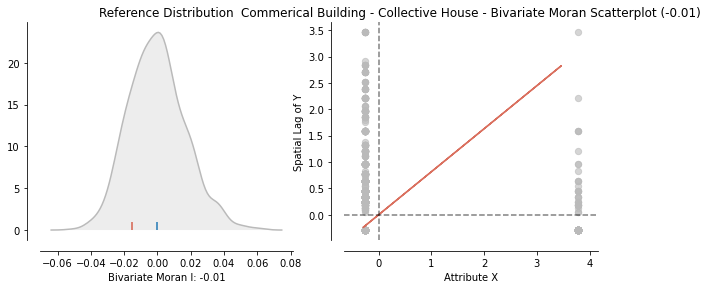

In [137]:
#commercial building- collective house
data_1 = pd.concat([p1, p2, p3, s1, s2, s3, s4])
d1 = data_1.copy()
d1['x']= [1 if x =='commercial_building' else 0 for x in d1['class'] ]
d1['y']= [1 if y =='collective_house' else 0 for y in d1['class'] ]

#transfer to geo data
gdf = geopandas.GeoDataFrame(
    d1, geometry=geopandas.points_from_xy(d1['longitudes'], d1['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'

y = gdf['x'].values
x = gdf['y'].values

# Before we dive into Bivariate Moran startistics, let's make a quick overview which esda.moran objects are supported by moran_scatterplot:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

# plot
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()
# binary plot
plt.figure(figsize=(10, 10))
plot_moran_bv(moran_bv)
plt.title("Commerical Building - Collective House - Bivariate Moran Scatterplot (-0.01)")
plt.show()

In [134]:
from esda.moran import Moran_Local_BV

/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


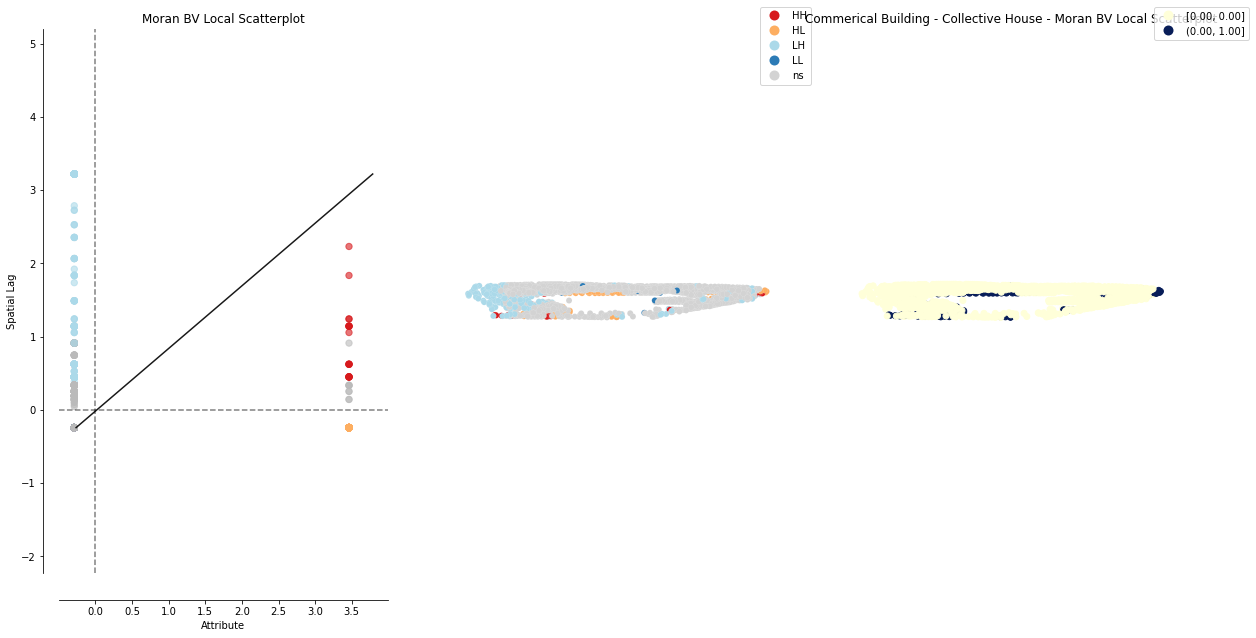

In [138]:
moran_loc_bv = Moran_Local_BV(x, y, w)
plot_local_autocorrelation(moran_loc_bv, gdf, 'y', figsize=(20, 10))
plt.title("Commerical Building - Collective House - Moran BV Local Scatterplot")
plt.show()

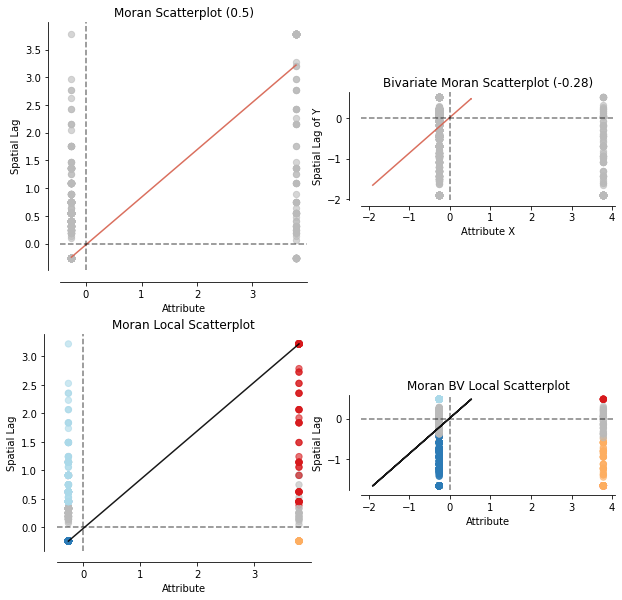

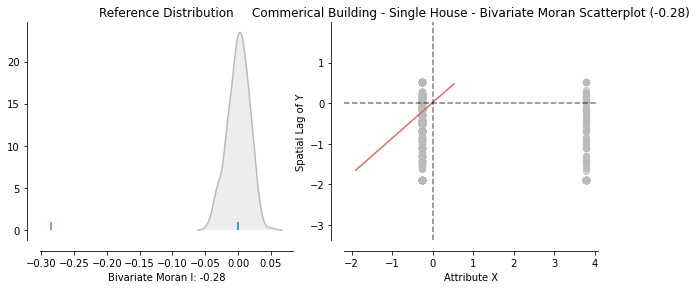

/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


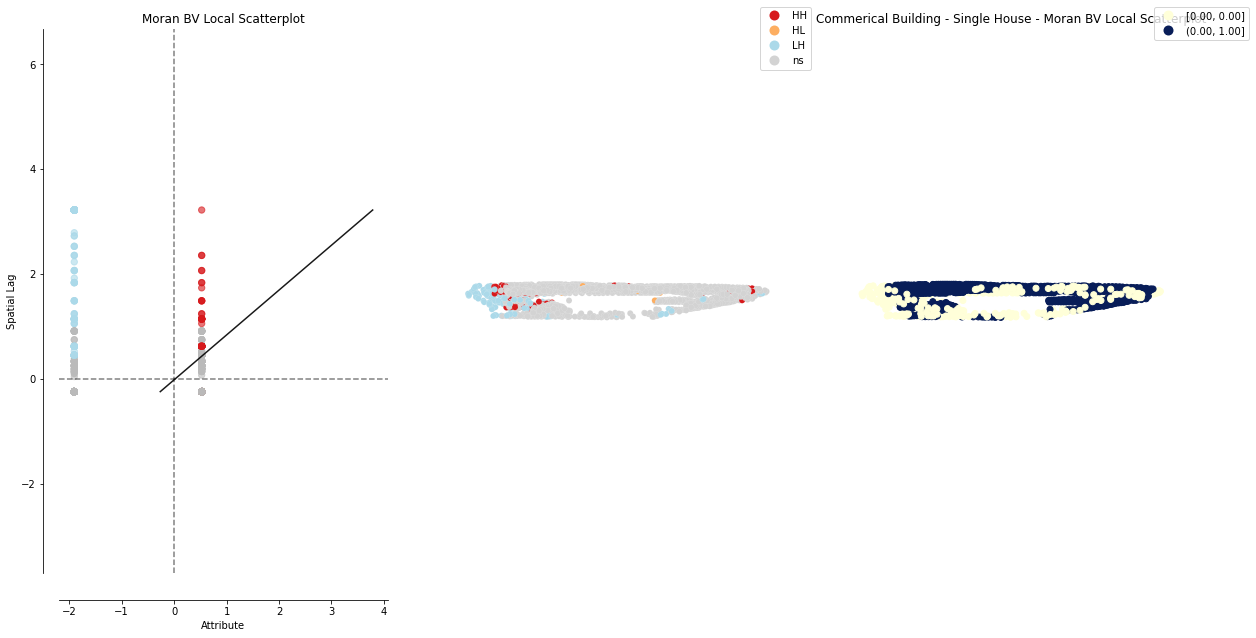

In [139]:
#commercial building-single house
data_1 = pd.concat([p1, p2, p3, s1, s2, s3, s4])
d1 = data_1.copy()
d1['x']= [1 if x =='commercial_building' else 0 for x in d1['class'] ]
d1['y']= [1 if y =='single_house' else 0 for y in d1['class'] ]

#transfer to geo data
gdf = geopandas.GeoDataFrame(
    d1, geometry=geopandas.points_from_xy(d1['longitudes'], d1['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'

y = gdf['x'].values
x = gdf['y'].values

# Before we dive into Bivariate Moran startistics, let's make a quick overview which esda.moran objects are supported by moran_scatterplot:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

# plot
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()
# binary plot
plot_moran_bv(moran_bv)
plt.title("Commerical Building - Single House - Bivariate Moran Scatterplot (-0.28)")
plt.show()

moran_loc_bv = Moran_Local_BV(x, y, w)
plot_local_autocorrelation(moran_loc_bv, gdf, 'y', figsize=(20, 10))
plt.title("Commerical Building - Single House - Moran BV Local Scatterplot")
plt.show()

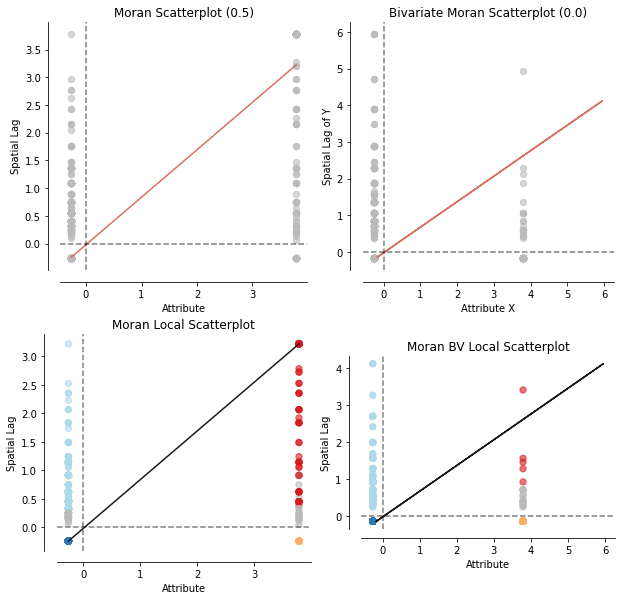

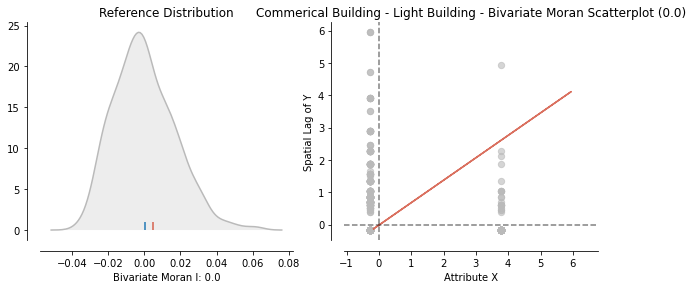

/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


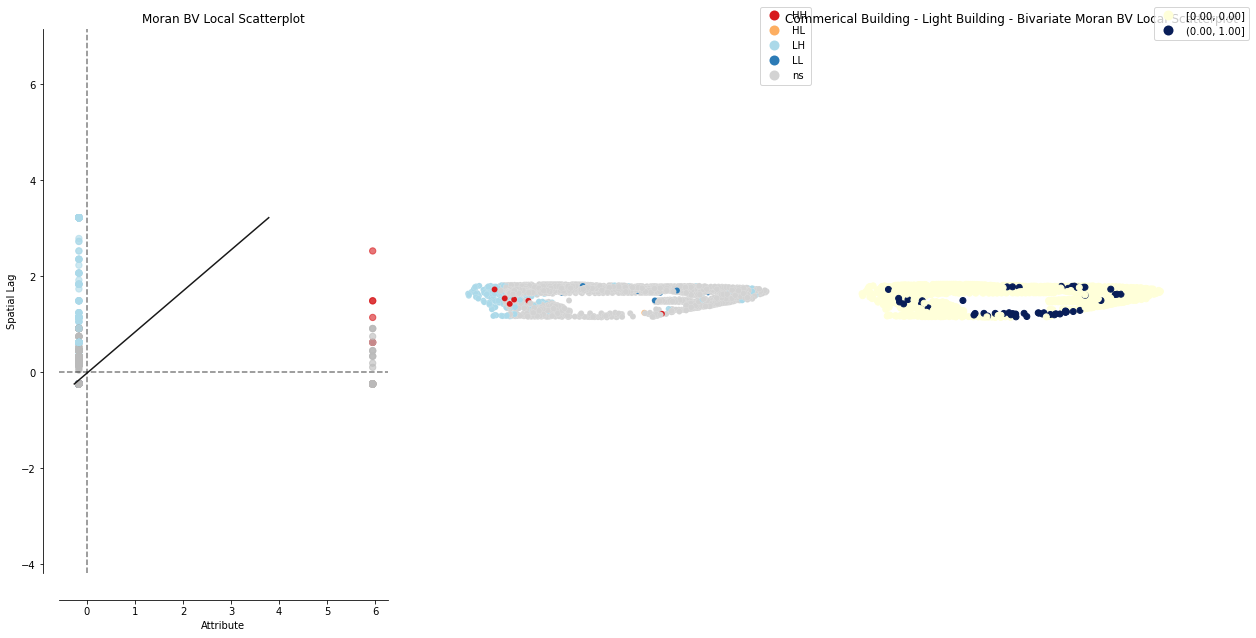

In [143]:
#commercial building-light building
data_1 = pd.concat([p1, p2, p3, s1, s2, s3, s4])
d1 = data_1.copy()
d1['x']= [1 if x =='commercial_building' else 0 for x in d1['class'] ]
d1['y']= [1 if y =='light_building' else 0 for y in d1['class'] ]

#transfer to geo data
gdf = geopandas.GeoDataFrame(
    d1, geometry=geopandas.points_from_xy(d1['longitudes'], d1['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'

y = gdf['x'].values
x = gdf['y'].values

# Before we dive into Bivariate Moran startistics, let's make a quick overview which esda.moran objects are supported by moran_scatterplot:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

# plot
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()
# binary plot
plot_moran_bv(moran_bv)
plt.title("Commerical Building - Light Building - Bivariate Moran Scatterplot (0.0)")
plt.show()

moran_loc_bv = Moran_Local_BV(x, y, w)
plot_local_autocorrelation(moran_loc_bv, gdf, 'y', figsize=(20, 10))
plt.title("Commerical Building - Light Building - Bivariate Moran BV Local Scatterplot")
plt.show()

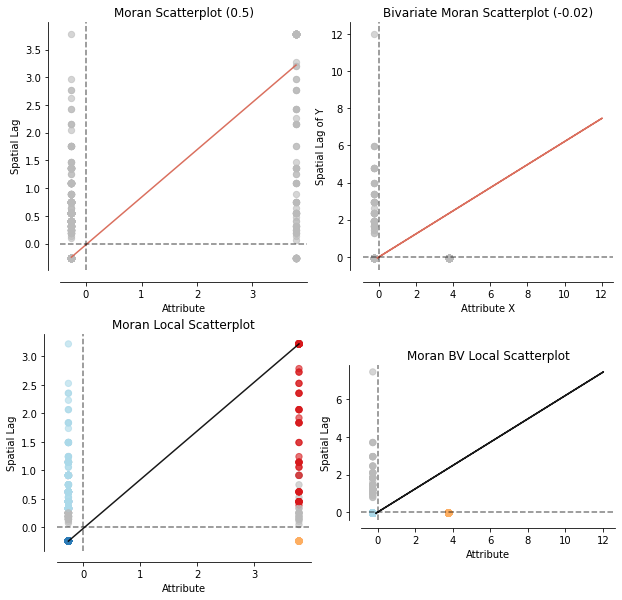

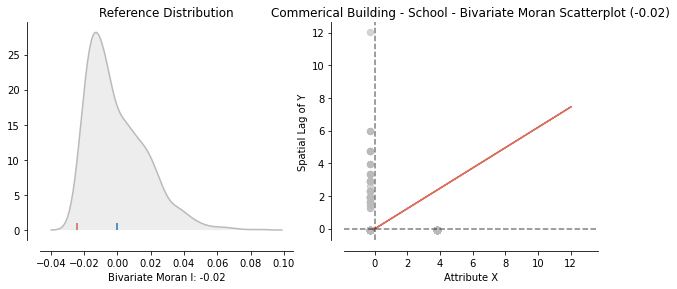

/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


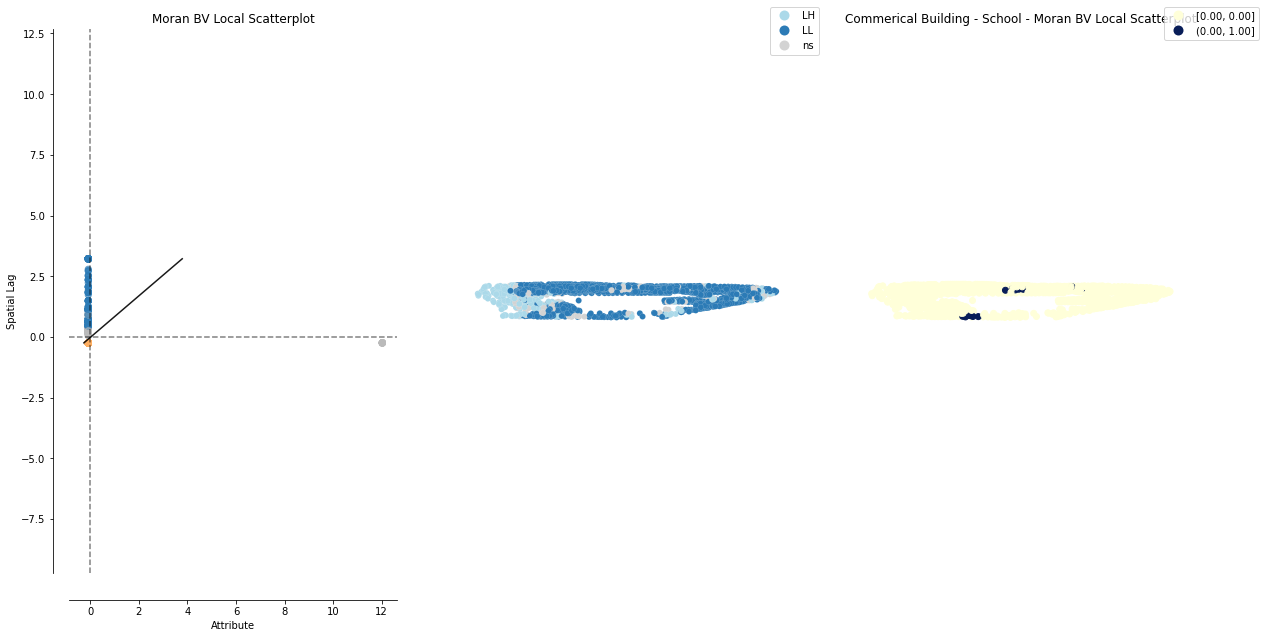

In [144]:
#commercial building- school
data_1 = pd.concat([p1, p2, p3, s1, s2, s3, s4])
d1 = data_1.copy()
d1['x']= [1 if x =='commercial_building' else 0 for x in d1['class'] ]
d1['y']= [1 if y =='school' else 0 for y in d1['class'] ]

#transfer to geo data
gdf = geopandas.GeoDataFrame(
    d1, geometry=geopandas.points_from_xy(d1['longitudes'], d1['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'

y = gdf['x'].values
x = gdf['y'].values

# Before we dive into Bivariate Moran startistics, let's make a quick overview which esda.moran objects are supported by moran_scatterplot:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

# plot
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()
# binary plot
plot_moran_bv(moran_bv)
plt.title("Commerical Building - School - Bivariate Moran Scatterplot (-0.02)")
plt.show()

moran_loc_bv = Moran_Local_BV(x, y, w)
plot_local_autocorrelation(moran_loc_bv, gdf, 'y', figsize=(20, 10))
plt.title("Commerical Building - School - Moran BV Local Scatterplot")
plt.show()

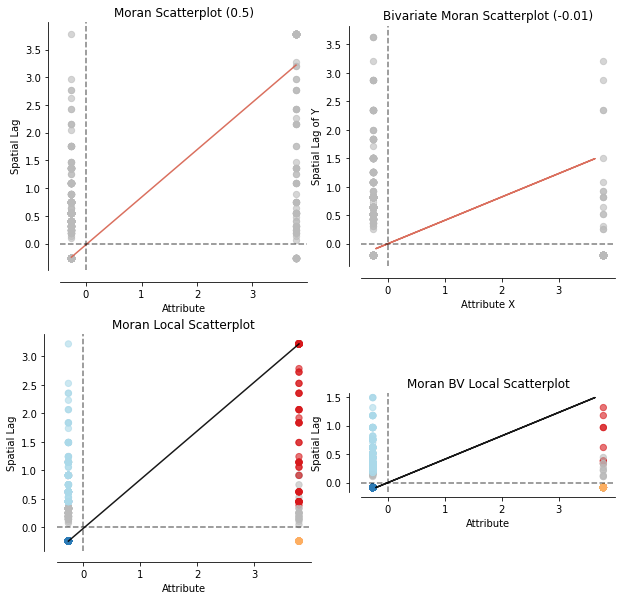

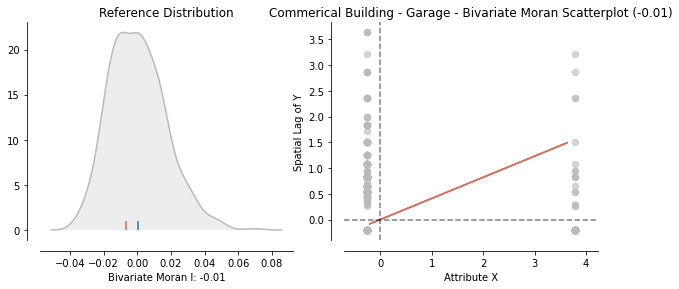

/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


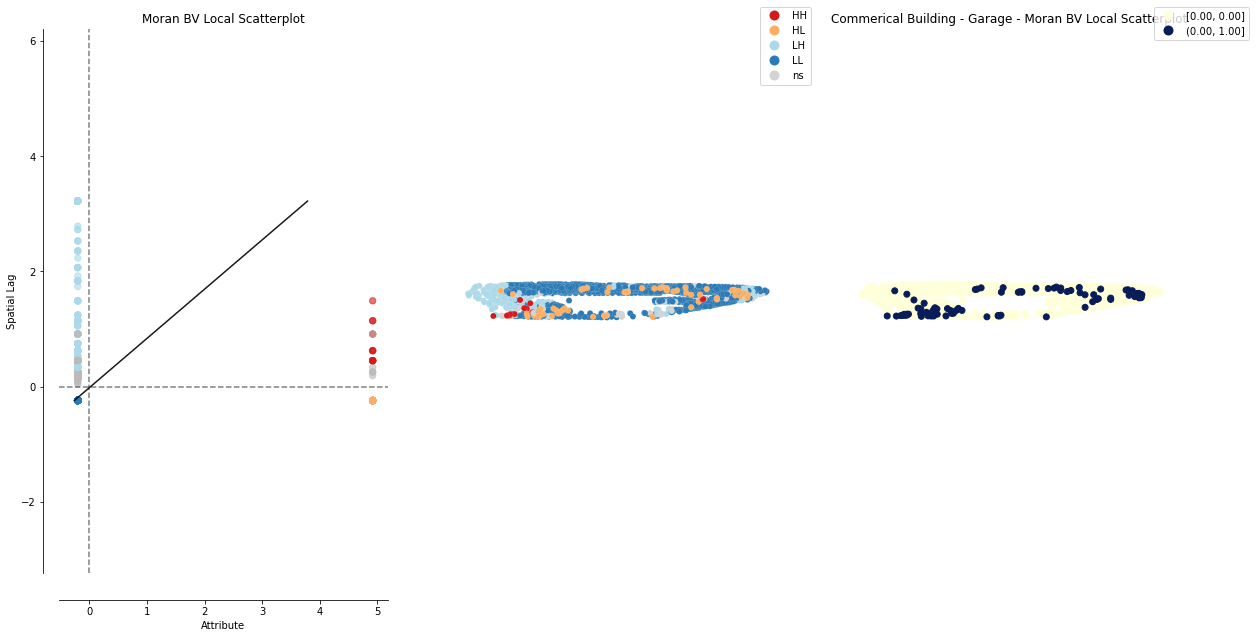

In [145]:
#commercial building-garage
data_1 = pd.concat([p1, p2, p3, s1, s2, s3, s4])
d1 = data_1.copy()
d1['x']= [1 if x =='commercial_building' else 0 for x in d1['class'] ]
d1['y']= [1 if y =='garage' else 0 for y in d1['class'] ]

#transfer to geo data
gdf = geopandas.GeoDataFrame(
    d1, geometry=geopandas.points_from_xy(d1['longitudes'], d1['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'

y = gdf['x'].values
x = gdf['y'].values

# Before we dive into Bivariate Moran startistics, let's make a quick overview which esda.moran objects are supported by moran_scatterplot:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

# plot
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()
# binary plot
plot_moran_bv(moran_bv)
plt.title("Commerical Building - Garage - Bivariate Moran Scatterplot (-0.01)")
plt.show()

moran_loc_bv = Moran_Local_BV(x, y, w)
plot_local_autocorrelation(moran_loc_bv, gdf, 'y', figsize=(20, 10))
plt.title("Commerical Building - Garage - Moran BV Local Scatterplot ")
plt.show()

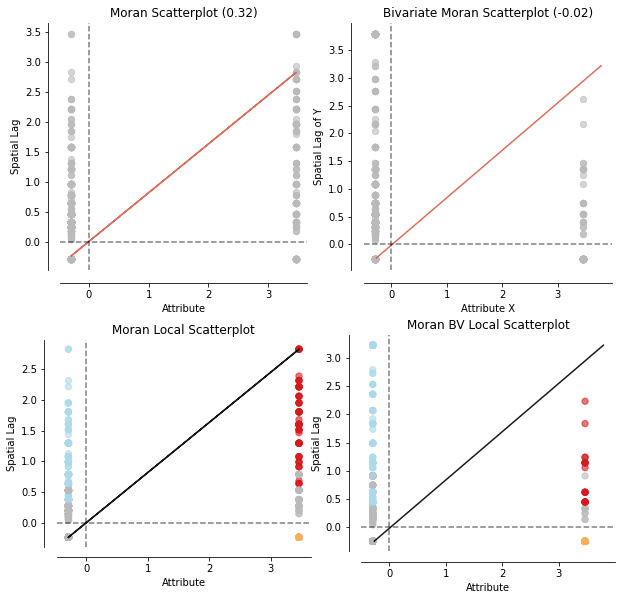

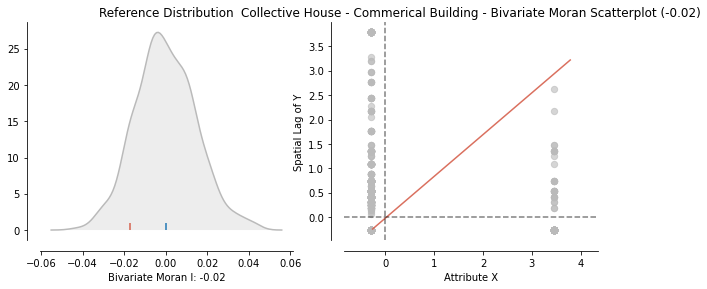

/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


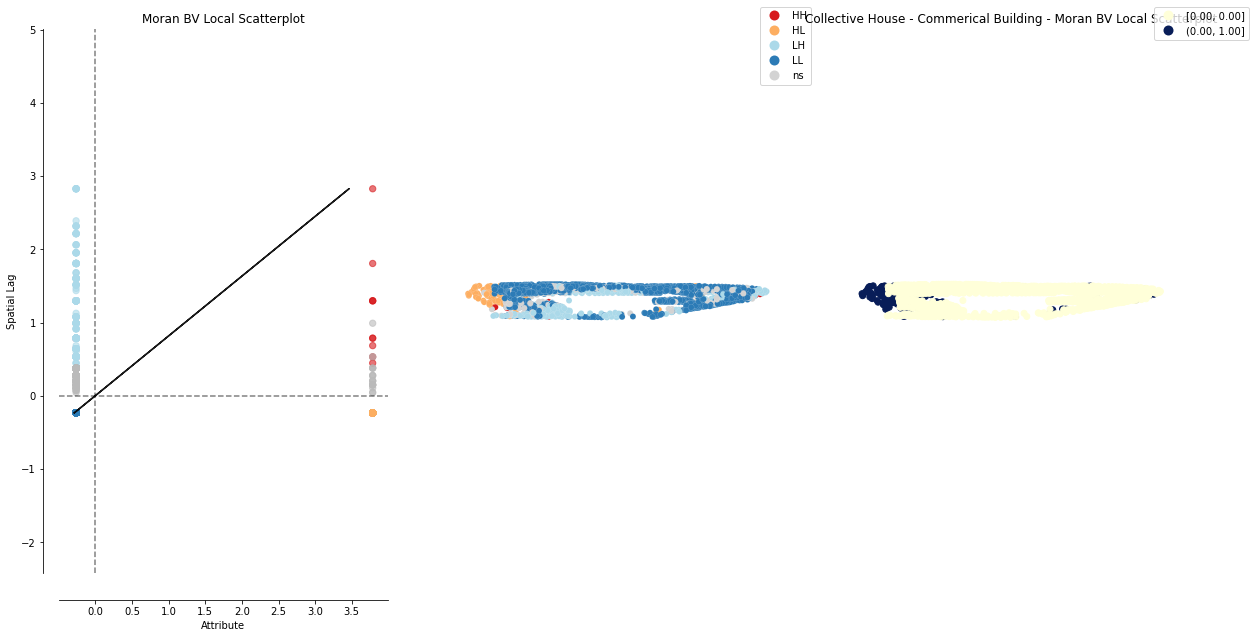

In [146]:
#collective house- commercial building
data_1 = pd.concat([p1, p2, p3, s1, s2, s3, s4])
d1 = data_1.copy()
d1['x']= [1 if x =='collective_house' else 0 for x in d1['class'] ]
d1['y']= [1 if y =='commercial_building' else 0 for y in d1['class'] ]

#transfer to geo data
gdf = geopandas.GeoDataFrame(
    d1, geometry=geopandas.points_from_xy(d1['longitudes'], d1['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'

y = gdf['x'].values
x = gdf['y'].values

# Before we dive into Bivariate Moran startistics, let's make a quick overview which esda.moran objects are supported by moran_scatterplot:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

# plot
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()
# binary plot
plot_moran_bv(moran_bv)
plt.title("Collective House - Commerical Building - Bivariate Moran Scatterplot (-0.02)")
plt.show()

moran_loc_bv = Moran_Local_BV(x, y, w)
plot_local_autocorrelation(moran_loc_bv, gdf, 'y', figsize=(20, 10))
plt.title("Collective House - Commerical Building - Moran BV Local Scatterplot")
plt.show()

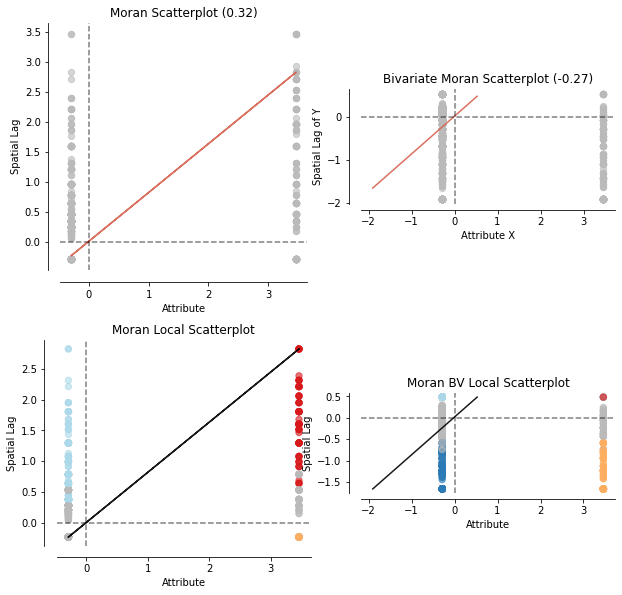

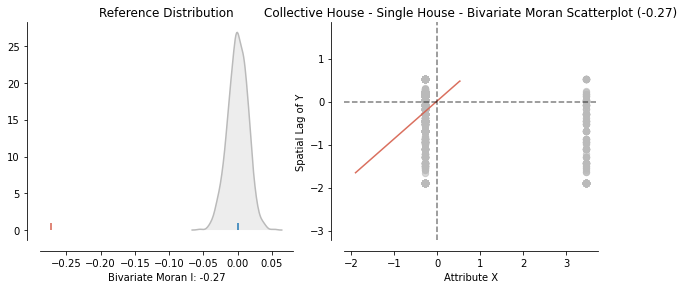

/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


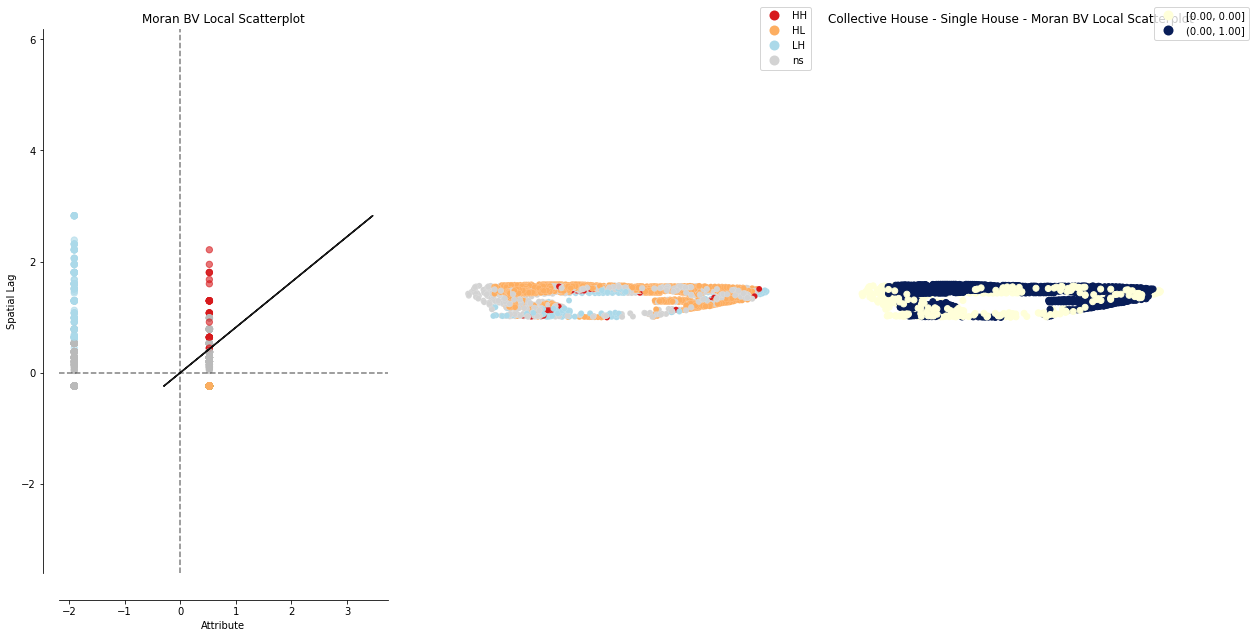

In [147]:
#collective house- single house
data_1 = pd.concat([p1, p2, p3, s1, s2, s3, s4])
d1 = data_1.copy()
d1['x']= [1 if x =='collective_house' else 0 for x in d1['class'] ]
d1['y']= [1 if y =='single_house' else 0 for y in d1['class'] ]

#transfer to geo data
gdf = geopandas.GeoDataFrame(
    d1, geometry=geopandas.points_from_xy(d1['longitudes'], d1['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'

y = gdf['x'].values
x = gdf['y'].values

# Before we dive into Bivariate Moran startistics, let's make a quick overview which esda.moran objects are supported by moran_scatterplot:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

# plot
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()
# binary plot
plot_moran_bv(moran_bv)
plt.title("Collective House - Single House - Bivariate Moran Scatterplot (-0.27)")
plt.show()

moran_loc_bv = Moran_Local_BV(x, y, w)
plot_local_autocorrelation(moran_loc_bv, gdf, 'y', figsize=(20, 10))
plt.title("Collective House - Single House - Moran BV Local Scatterplot")
plt.show()

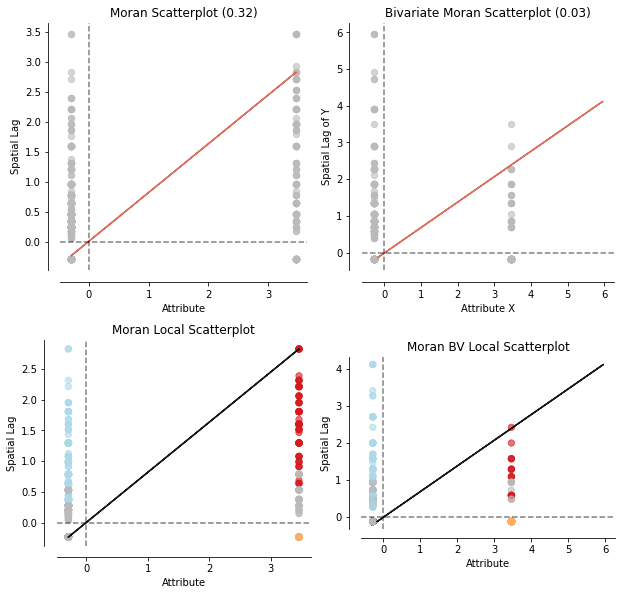

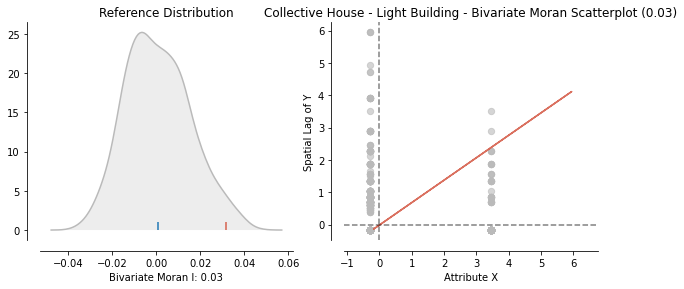

/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


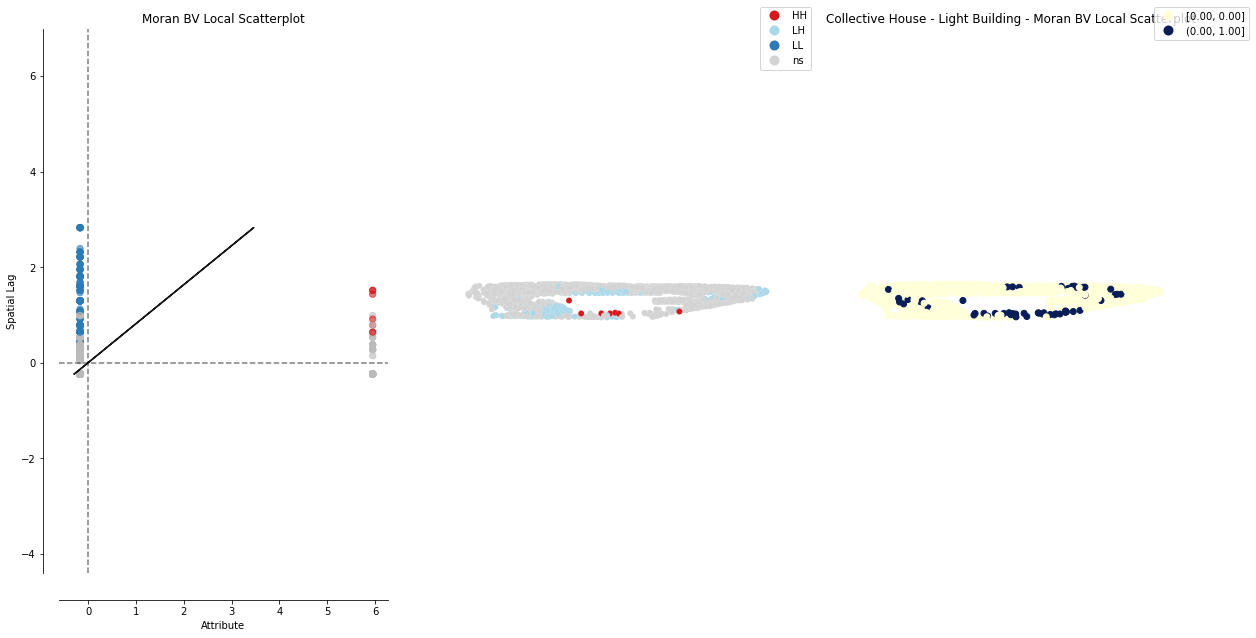

In [148]:
#collective house- light house
data_1 = pd.concat([p1, p2, p3, s1, s2, s3, s4])
d1 = data_1.copy()
d1['x']= [1 if x =='collective_house' else 0 for x in d1['class'] ]
d1['y']= [1 if y =='light_building' else 0 for y in d1['class'] ]

#transfer to geo data
gdf = geopandas.GeoDataFrame(
    d1, geometry=geopandas.points_from_xy(d1['longitudes'], d1['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'

y = gdf['x'].values
x = gdf['y'].values

# Before we dive into Bivariate Moran startistics, let's make a quick overview which esda.moran objects are supported by moran_scatterplot:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

# plot
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()
# binary plot
plot_moran_bv(moran_bv)
plt.title("Collective House - Light Building - Bivariate Moran Scatterplot (0.03)")
plt.show()

moran_loc_bv = Moran_Local_BV(x, y, w)
plot_local_autocorrelation(moran_loc_bv, gdf, 'y', figsize=(20, 10))
plt.title("Collective House - Light Building - Moran BV Local Scatterplot")
plt.show()

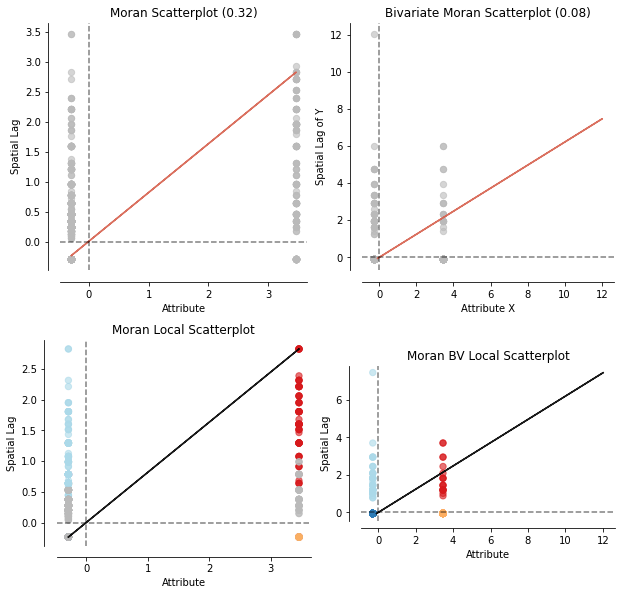

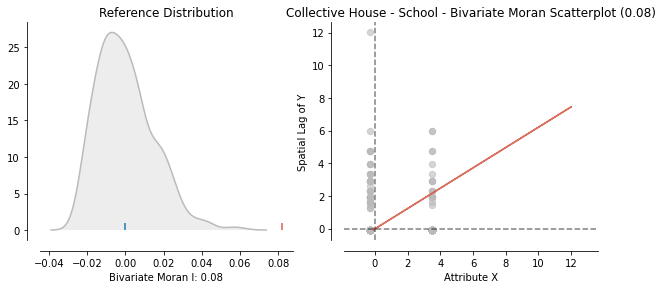

/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


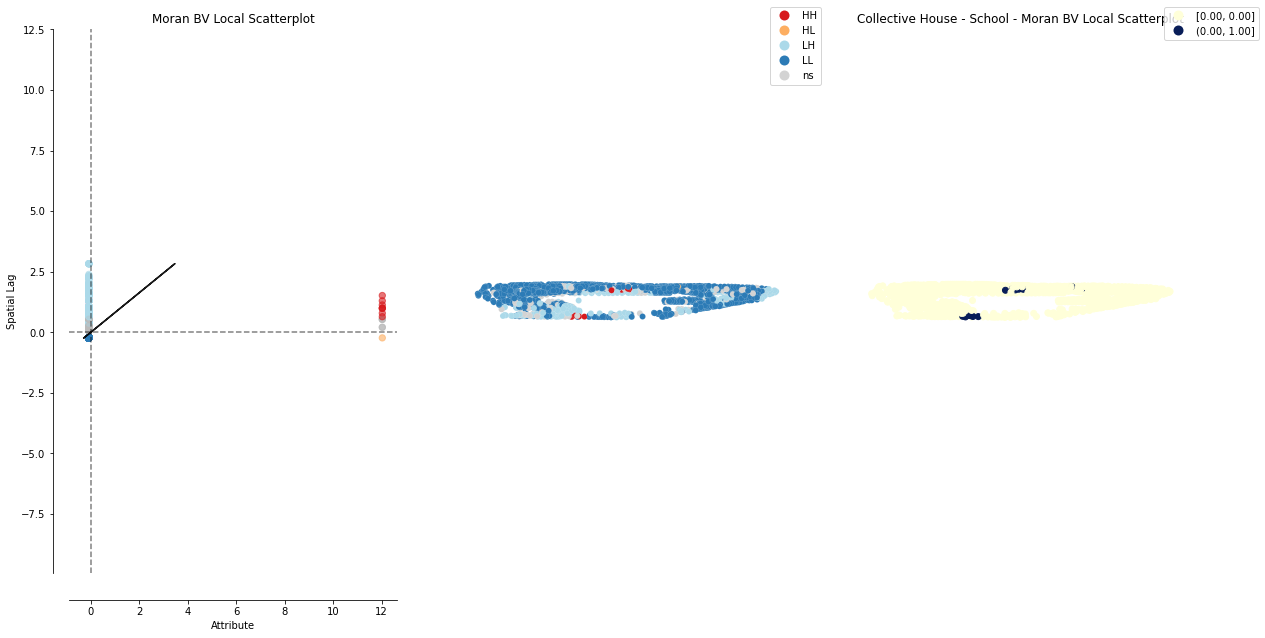

In [149]:
#collective house- school
data_1 = pd.concat([p1, p2, p3, s1, s2, s3, s4])
d1 = data_1.copy()
d1['x']= [1 if x =='collective_house' else 0 for x in d1['class'] ]
d1['y']= [1 if y =='school' else 0 for y in d1['class'] ]

#transfer to geo data
gdf = geopandas.GeoDataFrame(
    d1, geometry=geopandas.points_from_xy(d1['longitudes'], d1['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'

y = gdf['x'].values
x = gdf['y'].values

# Before we dive into Bivariate Moran startistics, let's make a quick overview which esda.moran objects are supported by moran_scatterplot:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

# plot
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()
# binary plot
plot_moran_bv(moran_bv)
plt.title("Collective House - School - Bivariate Moran Scatterplot (0.08)")
plt.show()

moran_loc_bv = Moran_Local_BV(x, y, w)
plot_local_autocorrelation(moran_loc_bv, gdf, 'y', figsize=(20, 10))
plt.title("Collective House - School - Moran BV Local Scatterplot")
plt.show()

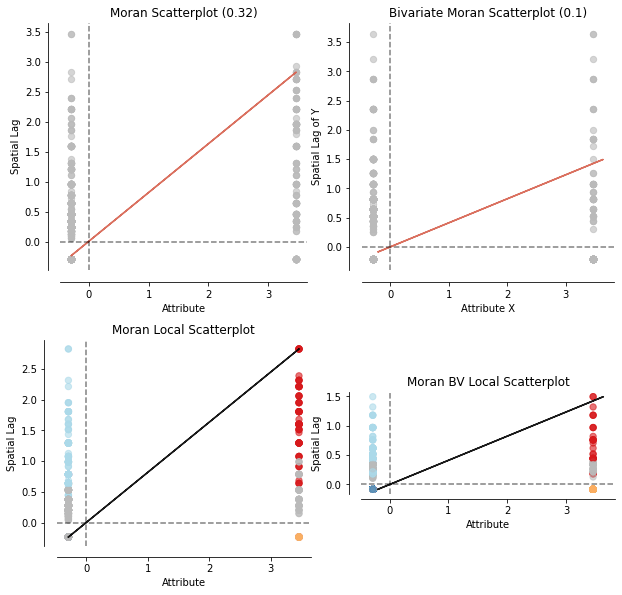

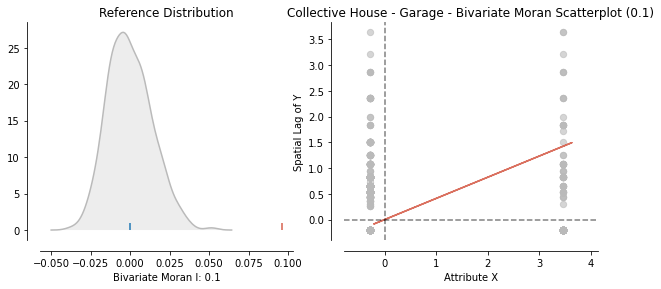

/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:236: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/hoangvo/anaconda3/envs/Data-mining/lib/python3.7/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


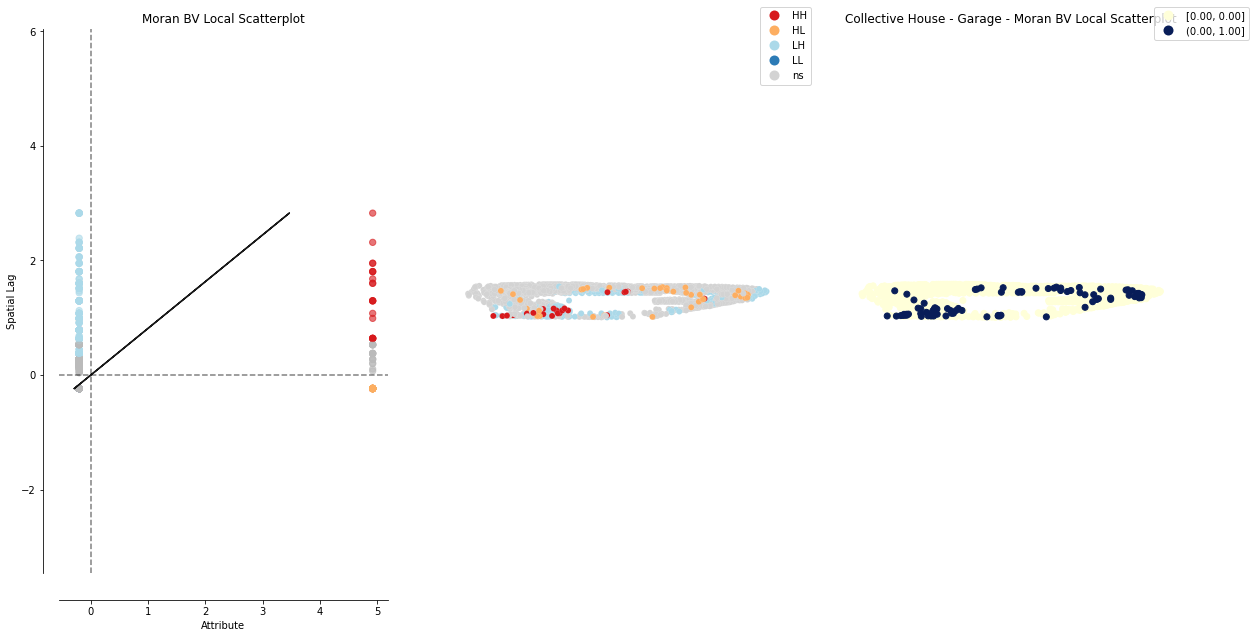

In [150]:
#collective house- garage
data_1 = pd.concat([p1, p2, p3, s1, s2, s3, s4])
d1 = data_1.copy()
d1['x']= [1 if x =='collective_house' else 0 for x in d1['class'] ]
d1['y']= [1 if y =='garage' else 0 for y in d1['class'] ]

#transfer to geo data
gdf = geopandas.GeoDataFrame(
    d1, geometry=geopandas.points_from_xy(d1['longitudes'], d1['latitudes']))


w = Queen.from_dataframe(gdf)
w.transform = 'r'

y = gdf['x'].values
x = gdf['y'].values

# Before we dive into Bivariate Moran startistics, let's make a quick overview which esda.moran objects are supported by moran_scatterplot:
moran = Moran(y,w)
moran_bv = Moran_BV(y, x, w)
moran_loc = Moran_Local(y, w)
moran_loc_bv = Moran_Local_BV(y, x, w)

# plot
fig, axs = plt.subplots(2, 2, figsize=(10,10),
                        subplot_kw={'aspect': 'equal'})

moran_scatterplot(moran, ax=axs[0,0])
moran_scatterplot(moran_loc, p=0.05, ax=axs[1,0])
moran_scatterplot(moran_bv, ax=axs[0,1])
moran_scatterplot(moran_loc_bv, p=0.05, ax=axs[1,1])
plt.show()
# binary plot
plot_moran_bv(moran_bv)
plt.title("Collective House - Garage - Bivariate Moran Scatterplot (0.1)")
plt.show()

moran_loc_bv = Moran_Local_BV(x, y, w)
plot_local_autocorrelation(moran_loc_bv, gdf, 'y', figsize=(20, 10))
plt.title("Collective House - Garage - Moran BV Local Scatterplot")
plt.show()